<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING PROJECT </h1> </center> <br>
<center> TECHSCAPE </center>

**GROUP :** <br>
- Gabriel Souza (m20210598@novaims.unl.pt) <br>
- Luiz Vizeu (m20210598@novaims.unl.pt) <br>
- Lorena(m20210598@novaims.unl.pt) <br>
- Hajeeva(m20210598@novaims.unl.pt) <br>

**Table of Contents** <br>
* [0. Structure](#structure)
* [1.0 Import](#import)
* [2.0 Data Exploration](#exploration)
* [3.0 Data Preprocessing](#preprocessing)
    * [3.1 Scaling](#scalling)
    * [3.2 Feature Selection](#feature)
    * [3.3 One-Hot Encoding](#encoding)
* [4.0 Model Selection and Assessment](#model)
    * [4.1 Logistic Regression](#lr)
    * [4.2 Decision Tree](#dt)
    * [4.3 Naive Bayes Classifier](#bayes)
    * [4.4 K-Nearest Neighbors](#knn)    
    * [4.5 Balanced Bagging Classifier](#bagging)
    * [4.6 Random Forest](#rf)
    * [4.7 Support Vector Machine Classifier (SVMs)](#svm)
* [5.0 Imbalanced Classification Techniques](#imbalanced)
    * [5.1 SMOTE - Synthetic Minority Oversampling Technique](#smote)
    * [5.2 ADASYN - Adaptive Synthetic Oversampling](#adasyn)
    * [5.3 Adaboost](#adaboost)
    * [5.4 Gradient Boosting](#gradient)
    * [5.5 Stacking in Classification](#stacking)
    
* [6.0 Final Model - Kaggle Submission](#kaggle)    


















<hr>
<a class="anchor" id="structure">
    
# 0. Structure
    
</a>

#### The project was divided in parts, folowing the Machine Learning scheme shown below

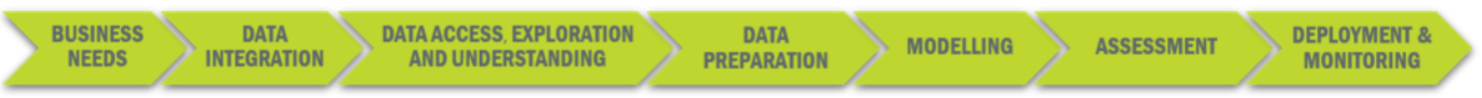

<hr>
<a class="anchor" id="import">
    
# 1.0 Import
    
</a>

In [1]:
#common packages
import pandas as pd
import numpy as np
import scipy as sp
from math import ceil
import scipy.stats as stats
import os
from itertools import product
import warnings
warnings.filterwarnings("ignore")
# from pandas_profiling import ProfileReport

#dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from scipy.stats import chi2_contingency

#standardization, enconders and principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


#Undersampling, Oversampling techniques
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SVMSMOTE 
#installing imbalanced-learn package to use Smote technique (for oversampling the minority classe)
#conda install -c conda-forge imbalanced-learn

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#model assessment
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#logistic regression
from sklearn.linear_model import LogisticRegression


#decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


#Balanced Bagging Classifier
from sklearn.ensemble import BaggingClassifier

#Support Vector Machine
from sklearn.svm import SVC

<hr>
<a class="anchor" id="exploration">
    
# 2.0 Data Exploration
    
</a>

In [2]:
#reading train dataset from csv file
train = pd.read_csv ('train.csv')
train.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [3]:
#reading test dataset from csv file
test = pd.read_csv ('test.csv')
test.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


In [4]:
#some explorations on the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [5]:
#some explorations on the train dataset
train.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [6]:
#some explorations on the train dataset
train.describe(include =['O'])

,Date,OS,Country,Type_of_Visitor
count,9999,9999,9999,9999
unique,305,8,9,3
top,25-May-20,Windows,Portugal,Returner
freq,120,5361,3870,8534


In [7]:
#creating new df to check the records along months
train_cleaned_date = train.copy()

train_cleaned_date['month']  = pd.to_datetime(train['Date'], format='%d-%b-%y')

<AxesSubplot:title={'center':'Purchases Per Month'}, xlabel='month'>

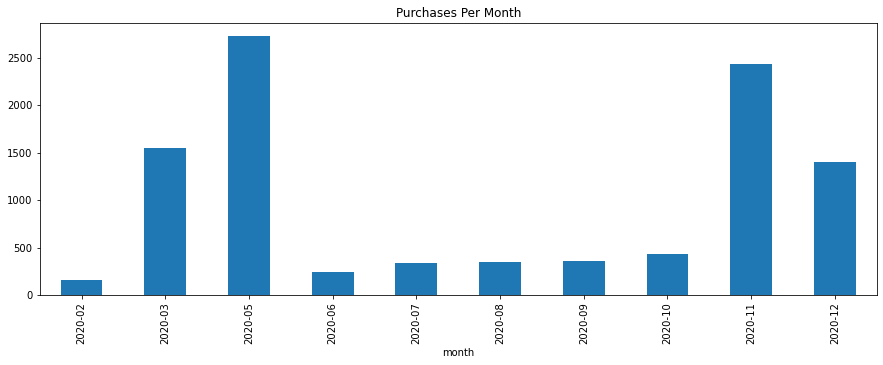

In [8]:
#Explores the records per date

# computes the count of records monthly and stores the results in the variable "count"
count = train_cleaned_date.groupby(train_cleaned_date['month'].dt.strftime('%Y-%m'))['Access_ID'].count()

#creates a plot to visualize the monthly values stored in "count" per year-month
count.plot(kind = 'bar',figsize = (15,5), title = 'Purchases Per Month', sharex = False)


<AxesSubplot:title={'center':'Purchases Per Month'}, xlabel='month'>

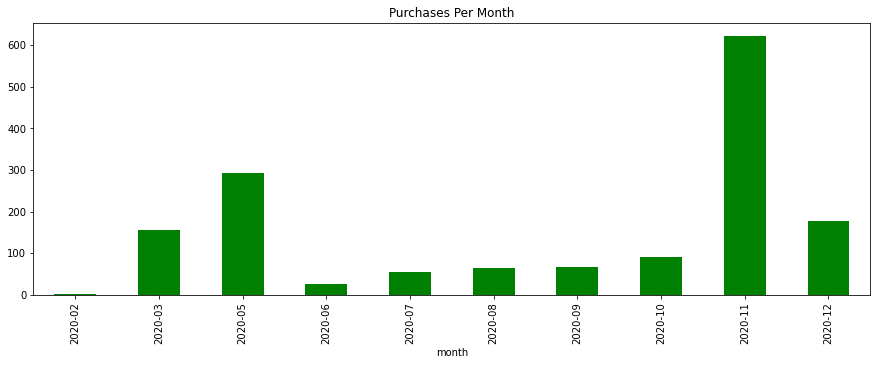

In [9]:
#Explores the purchases per date

# computes the count of records monthly and stores the results in the variable "Purchases"
Purchases = train_cleaned_date.groupby(train_cleaned_date['month'].dt.strftime('%Y-%m'))['Buy'].sum()

#creates a plot to visualize the monthly values stored in "Purchases" per year-month
Purchases.plot(kind = 'bar',figsize = (15,5), title = 'Purchases Per Month', sharex = False,color ='green')


In [10]:
#Define metric and non-metric features. 
non_metric_list = ["OS", "Country", "Type_of_Visitor","Browser","Type_of_Traffic","Date","Access_ID"]
metric_features = train.columns.drop(non_metric_list).to_list()
non_metric_features = ["OS", "Country", "Type_of_Visitor","Browser","Type_of_Traffic"]


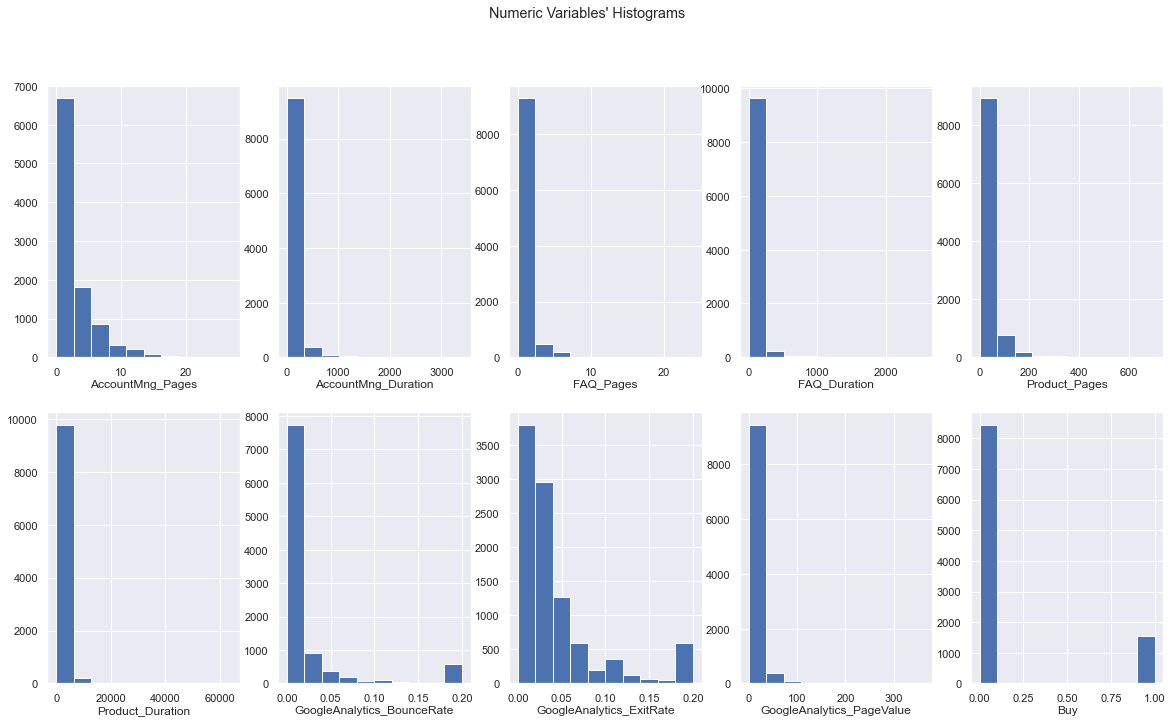

In [11]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()


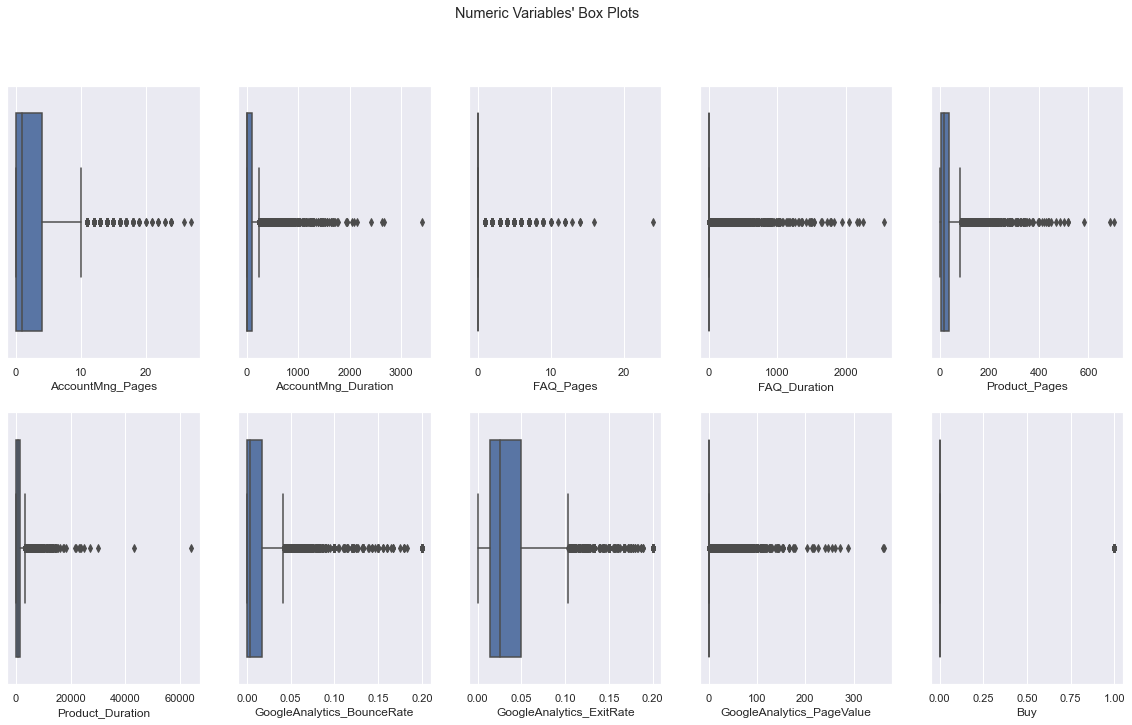

In [12]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()


In [13]:
#createing a copy of train dataset to test the method IQR to remove outliers
train_cleaned_iqr = train.copy()

In [14]:
# Outliers treatment, using IQR method over all metric features

"""it reduces almost 50% of the dataset in terms of records"""

# Compute the IQR interquartile range
q25 = train_cleaned_iqr.quantile(.25)
q75 = train_cleaned_iqr.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 3 * iqr
lower_lim = q25 - 3 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(train_cleaned_iqr[metric].between(llim, ulim, inclusive=True))

train_cleaned_iqr2 = train_cleaned_iqr[np.all(filters, 0)]

print('Percentage of data kept after removing outliers:', np.round(train_cleaned_iqr2.shape[0] / train_cleaned_iqr.shape[0], 4))

Percentage of data kept after removing outliers: 0.5252


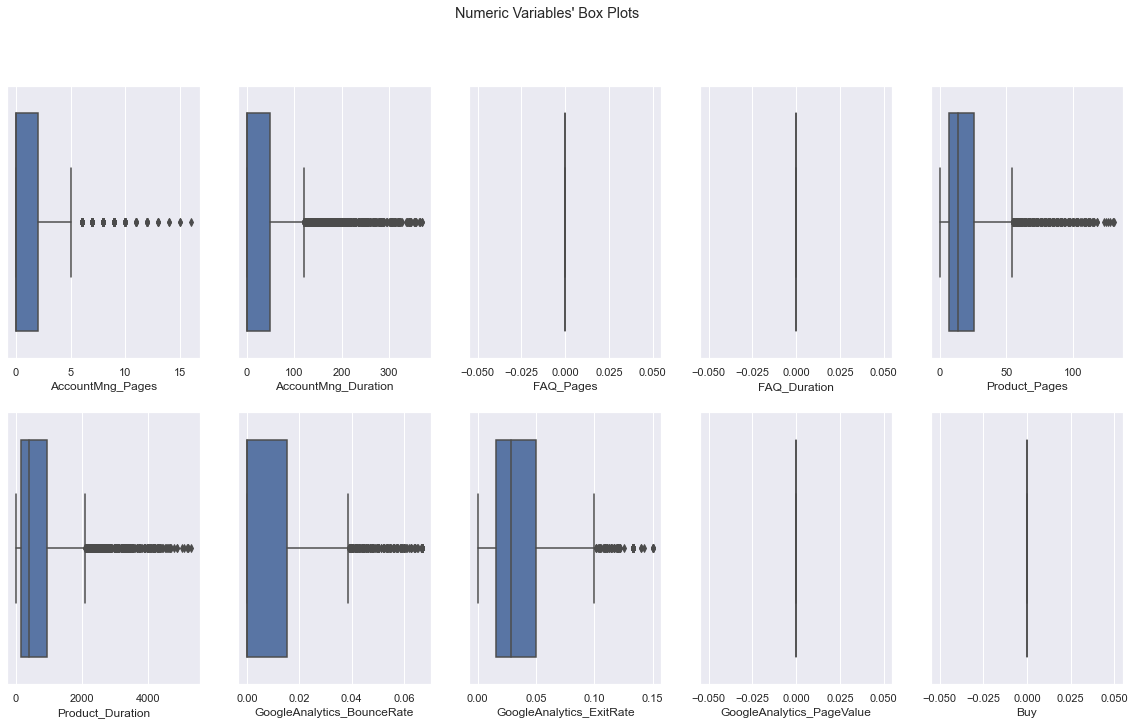

In [15]:
# Plotting numerical variables histograms after somulating the outlier treatment using IQR

"""it reduces almost 50% of the dataset in terms of records"""

sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train_cleaned_iqr2[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


In [16]:
#creating a new copy of train dataset to test another outlier removing method
train_cleaned = train.copy()

In [17]:
#treating "AccountMng_Pages" outliers
train_cleaned.loc[train_cleaned['AccountMng_Pages'] > 20, 'AccountMng_Pages'] = 20

#treating "AccountMng_Duration" outliers
train_cleaned.loc[train_cleaned['AccountMng_Duration'] > 1500, 'AccountMng_Duration'] = 1500

#treating "FAQ_Pages" outliers
train_cleaned.loc[train_cleaned['FAQ_Pages'] > 10, 'FAQ_Pages'] = 10

#treating "FAQ_Duration" outliers
train_cleaned.loc[train_cleaned['FAQ_Duration'] > 1500, 'FAQ_Duration'] = 1500

#treating "Product_Pages" outliers
train_cleaned.loc[train_cleaned['Product_Pages'] > 380, 'Product_Pages'] = 380

#treating "Product_Duration" outliers
train_cleaned.loc[train_cleaned['Product_Duration'] > 15000, 'Product_Duration'] = 15000


#treating "GoogleAnalytics_BounceRate" outliers
train_cleaned.loc[train_cleaned['GoogleAnalytics_BounceRate'] >= 0.15, 'GoogleAnalytics_BounceRate'] = 0.15

#treating "GoogleAnalytics_PageValue" outliers
train_cleaned.loc[train_cleaned['GoogleAnalytics_PageValue'] >170, 'GoogleAnalytics_PageValue'] = 170


In [18]:
"""take a look at Imbalanced dataset. Maybe we would return to this problem further 
reference: https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5
"""

'take a look at Imbalanced dataset. Maybe we would return to this problem further \nreference: https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5\n'

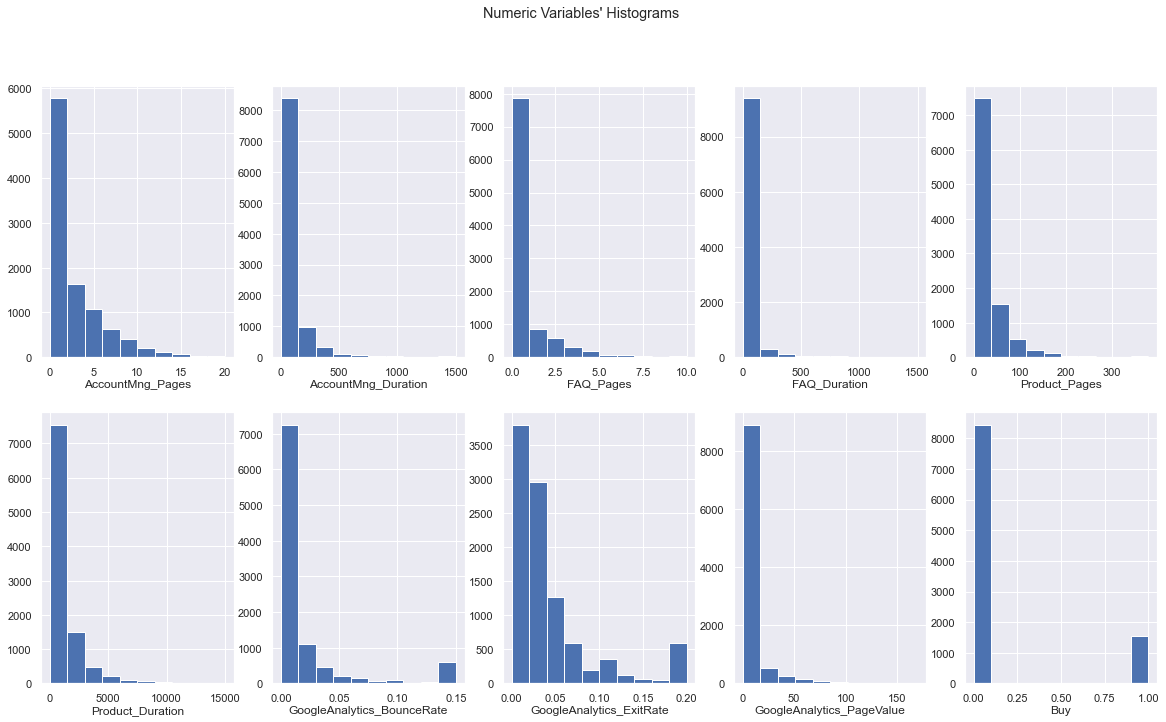

In [19]:
# All Numeric Variables' Histograms in one figure -- after treatment
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(train_cleaned[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()


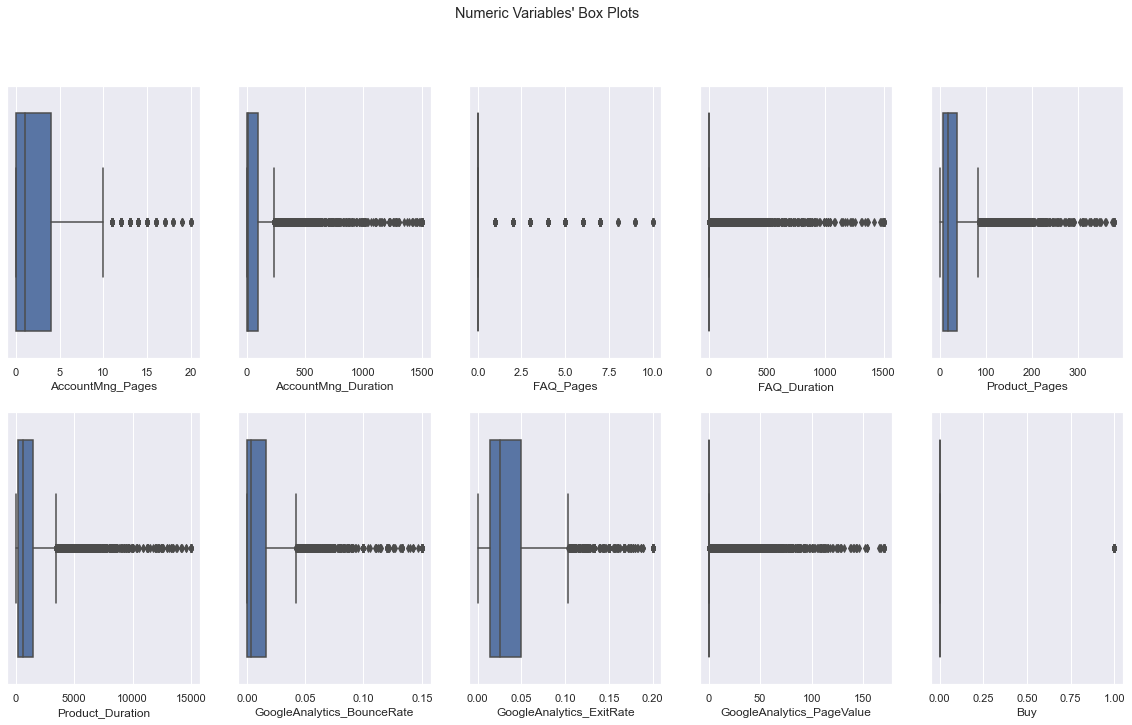

In [20]:
# All Numeric Variables' Box Plots in one figure  -- after treatment
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=train_cleaned[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

# plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()


In [21]:
#prints the shape and describes the train dataset after outlier treatment
print(train_cleaned.shape)
train_cleaned[metric_features].describe()

(9999, 17)


,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2.319932,80.186416,0.504050,33.967950,31.499950,1183.549721,0.019371,0.043181,5.845809,0.155216
std,3.315110,168.821584,1.237685,132.121748,42.681379,1728.676475,0.038407,0.048845,17.313098,0.362128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,0.000000
75%,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,0.000000
max,20.000000,1500.000000,10.000000,1500.000000,380.000000,15000.000000,0.150000,0.200000,170.000000,1.000000


In [22]:
#checking for missing values
print(train_cleaned[train_cleaned[non_metric_features] == 0].sum(),'\n')
print(train_cleaned[non_metric_features].isnull().sum())

Access_ID                     0.0
Date                            0
AccountMng_Pages              0.0
AccountMng_Duration           0.0
FAQ_Pages                     0.0
FAQ_Duration                  0.0
Product_Pages                 0.0
Product_Duration              0.0
GoogleAnalytics_BounceRate    0.0
GoogleAnalytics_ExitRate      0.0
GoogleAnalytics_PageValue     0.0
OS                              0
Browser                       0.0
Country                         0
Type_of_Traffic               0.0
Type_of_Visitor                 0
Buy                           0.0
dtype: object 

OS                 0
Country            0
Type_of_Visitor    0
Browser            0
Type_of_Traffic    0
dtype: int64


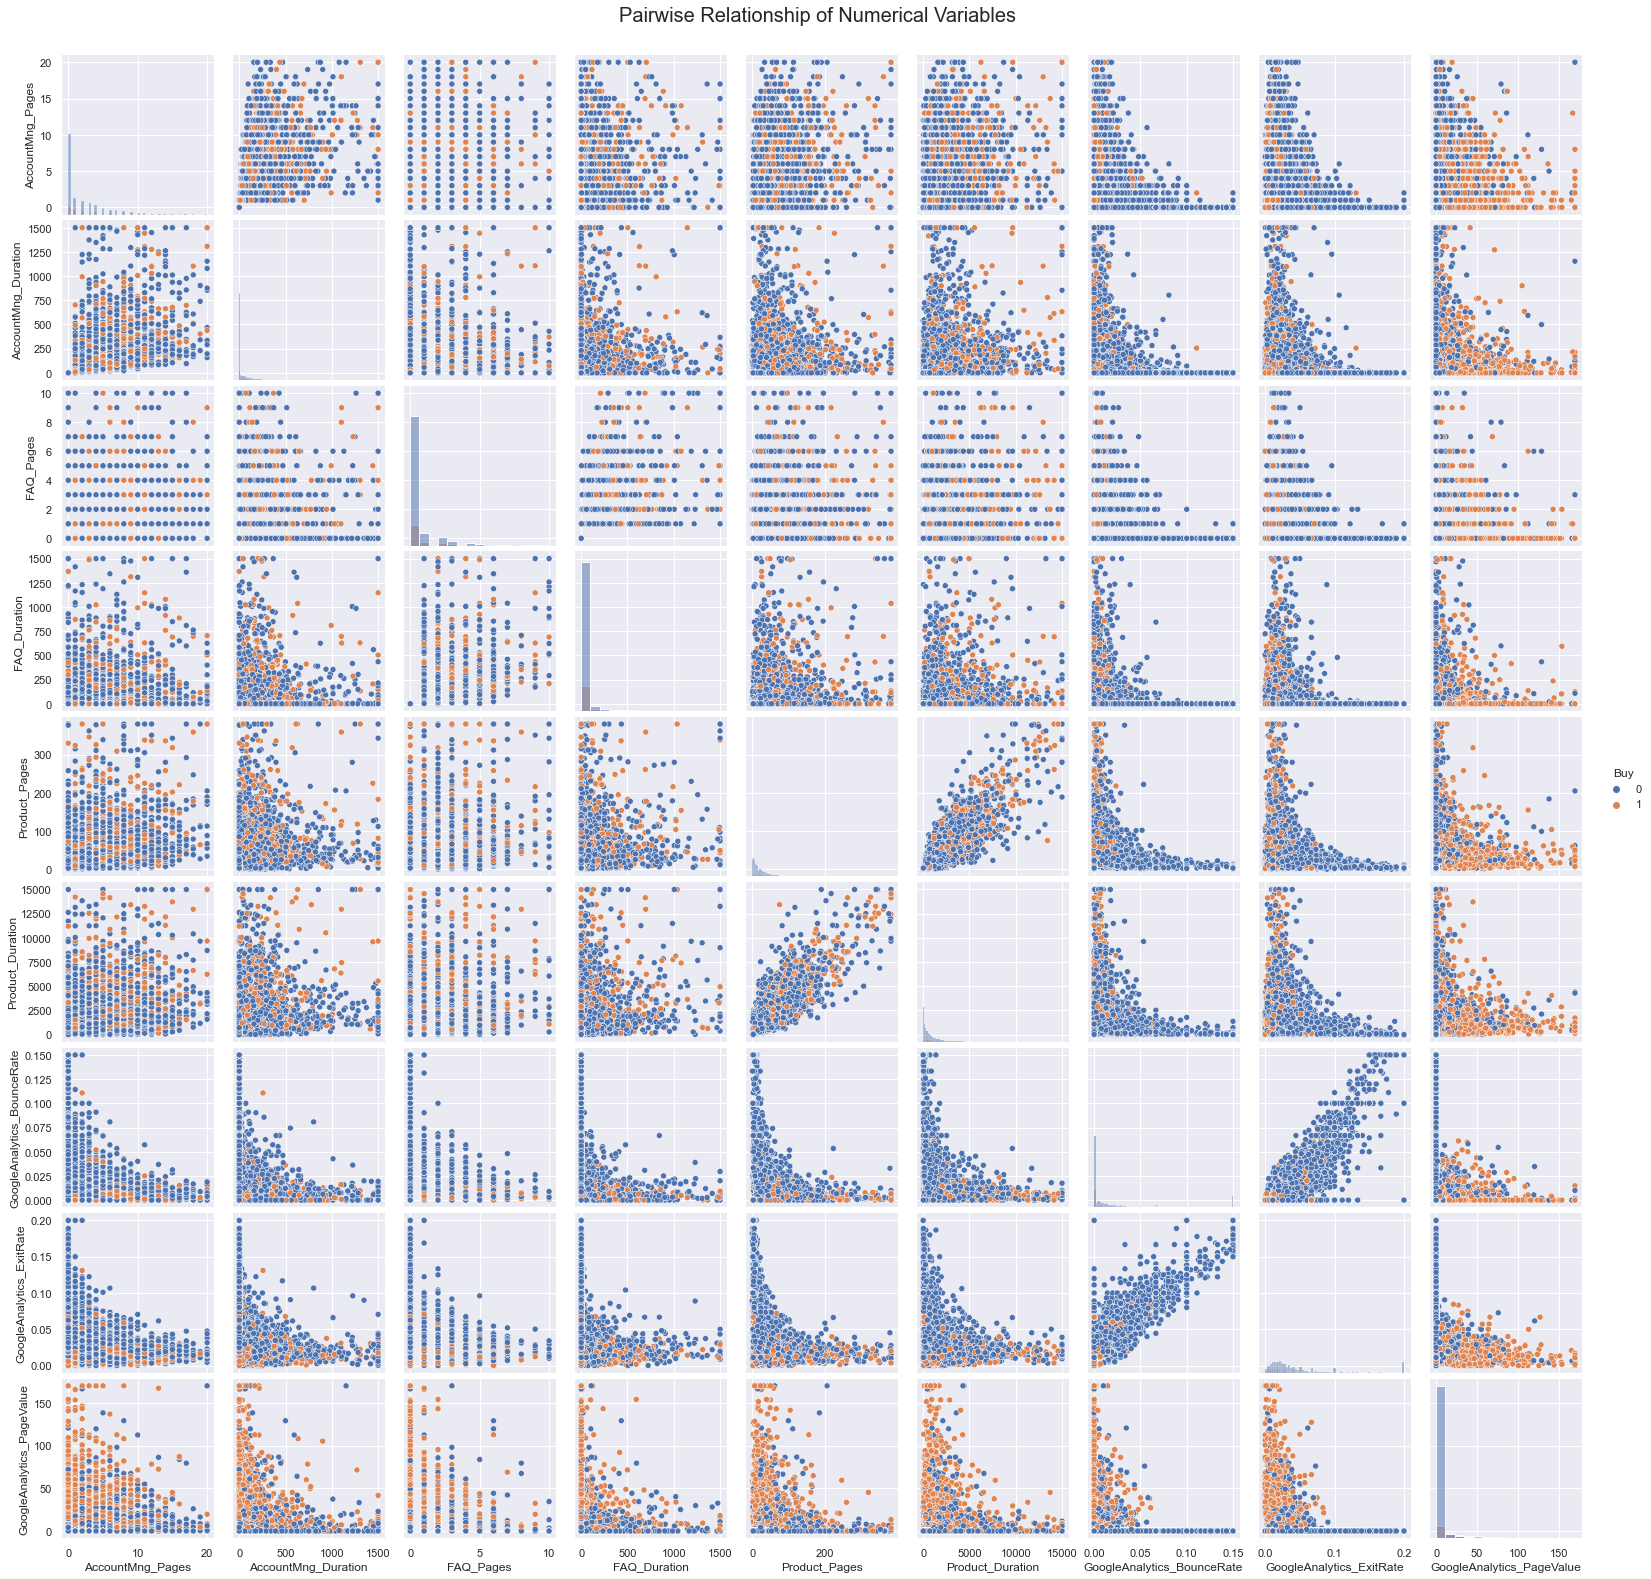

In [23]:
#exploring the metric features with a combined scatterplot

metric_features_2 = ['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']


# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(train_cleaned[metric_features_2 + ['Buy']], diag_kind="hist", hue='Buy')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

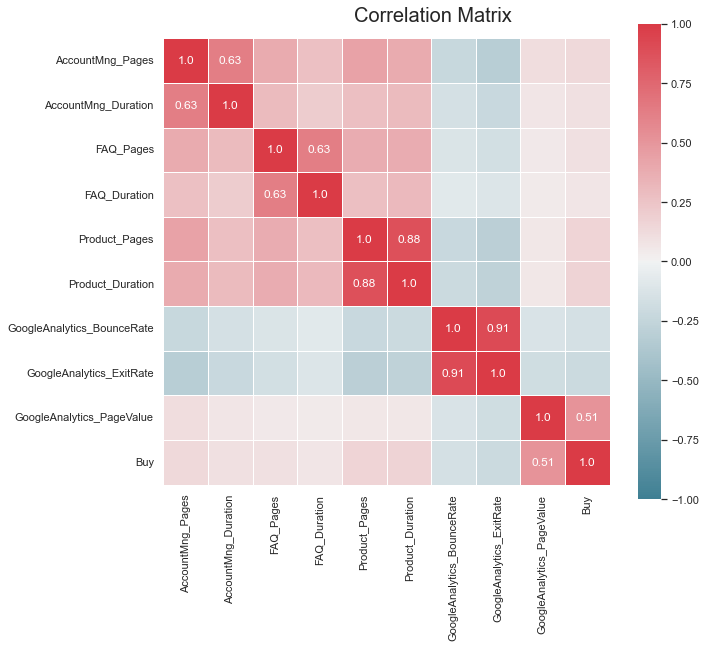

In [24]:
# plots the correlation matrix for the numerical variables

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(train_cleaned[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

# plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

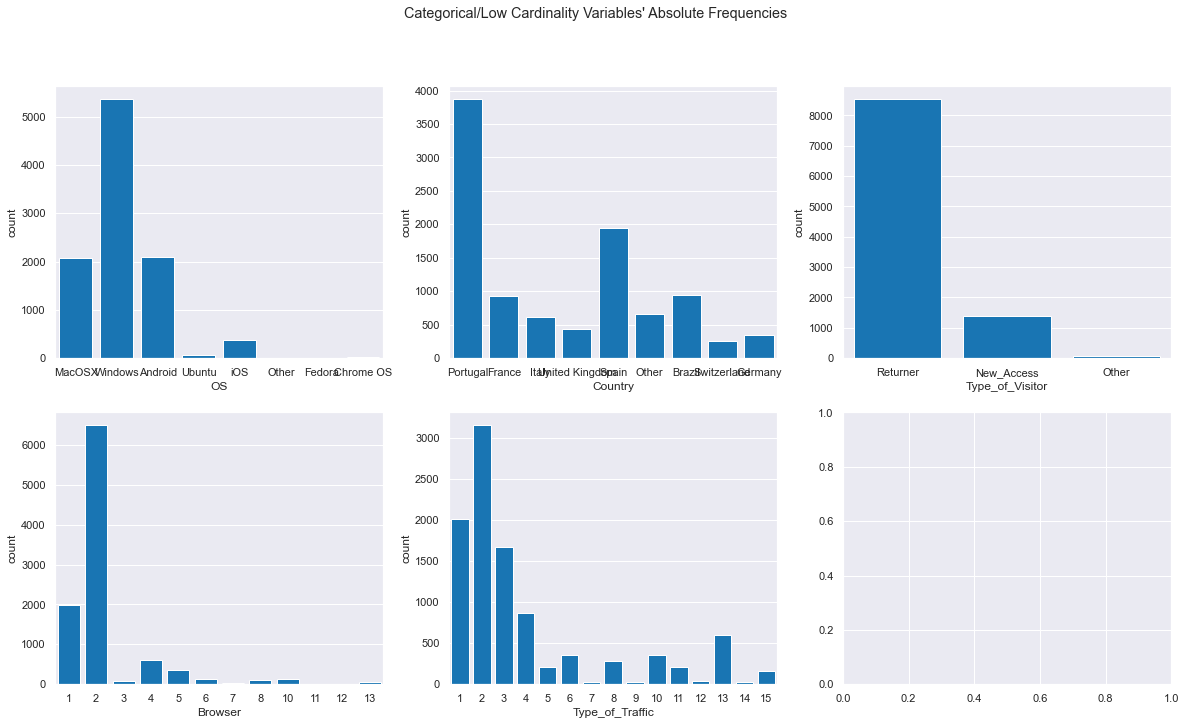

In [25]:
#exploring the categorial data with visualization
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))


# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(train_cleaned[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="preprocessing">
    
# 3.0 Data Preprocessing
    
</a>

In [26]:
#set Access_ID as index
train_cleaned.set_index('Access_ID', inplace = True)

In [27]:
#defining X_test from the test daframe and setting access_Id as index
test.set_index('Access_ID', inplace = True)
X_test = test.copy()

In [28]:
# split the dataset into train and validation datasets

X = train_cleaned.drop('Buy', axis = 1)
y = train_cleaned['Buy']


In [29]:
#By using the method train_test_split() from sklearn.model_selection, split the dataset

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [30]:
categorial_features = ["OS", "Country", "Type_of_Visitor","Browser","Type_of_Traffic","Date"]
numeric_features = X_train.columns.drop(categorial_features).to_list()

<hr>
<a class="anchor" id="scalling">
    
## 3.1 Scalling
    
</a>

In [31]:
#Scalling the X_train data for numeric_features using MinMax Scaller

scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train[numeric_features])

X_train_num_scaled = scaler.transform(X_train[numeric_features]) # this will return an array

X_test_num_scaled = scaler.transform(X_test[numeric_features]) #

# Convert the array to a pandas dataframe X_train
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train[numeric_features].columns).set_index(X_train[numeric_features].index)
X_train_num_scaled.head()

# Convert the array to a pandas dataframe X_test
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test[numeric_features].columns).set_index(X_test[numeric_features].index)

In [32]:
#Scalling the X_val data for numeric_features using MinMax Scaller applied in X_train

X_val_num_scaled = scaler.transform(X_val[numeric_features])

# Convert the array to a pandas dataframe
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val[numeric_features].columns).set_index(X_val[numeric_features].index)
X_val_num_scaled.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue
Access_ID,,,,,,,,,
674897518,-1.0,-1.000000,-1.0,-1.000000,-0.968421,-0.996667,0.777333,0.222,-1.000000
474010534,-0.9,-0.994667,-1.0,-1.000000,-0.921053,-0.949667,-1.000000,-0.980,-0.179845
242890588,-0.5,-0.394667,-0.8,-0.977333,-0.847368,-0.798053,-0.704000,-0.709,-1.000000
390265745,-1.0,-1.000000,-1.0,-1.000000,-0.936842,-0.915767,-0.273333,-0.273,-0.105233
430925192,-0.5,-0.361000,-0.6,-0.892000,-0.784211,-0.819269,-1.000000,-0.929,-1.000000


<hr>
<a class="anchor" id="feature">
    
## 3.2 Feature Selection
    
</a>

In [33]:
# Checks if any of the numerical variables is univariate (variance is equal to 0). 
# If so we would drop those variables.

X_train_num_scaled.var()

AccountMng_Pages              0.109847
AccountMng_Duration           0.048950
FAQ_Pages                     0.062756
FAQ_Duration                  0.031596
Product_Pages                 0.049917
Product_Duration              0.053445
GoogleAnalytics_BounceRate    0.263670
GoogleAnalytics_ExitRate      0.239747
GoogleAnalytics_PageValue     0.041349
dtype: float64

#### Filter Method: correlation

In [34]:
# creates a new dataframe with all the training data, but containing also the dependent variable, 
#so we can check if any of the independent variables are correlated with the target. 
#Naming this new dataframe as "all_train_num"

all_train_num = X_train_num_scaled.join(y_train)
print(all_train_num.shape)
all_train_num.head()

(6999, 10)


,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy
Access_ID,,,,,,,,,,
485098673,-0.9,-1.000000,-0.8,-0.92,-0.773684,-0.849092,-0.616000,-0.527,-1.000000,0
740418308,-0.9,-0.974667,-1.0,-1.00,-0.473684,-0.539029,-0.918667,-0.718,-1.000000,0
538092603,-0.6,-0.724000,-1.0,-1.00,-0.836842,-0.787702,-1.000000,-0.884,-0.328641,0
105875577,-1.0,-1.000000,-1.0,-1.00,-0.984211,-0.986933,-1.000000,-0.333,-1.000000,0
601182749,-1.0,-1.000000,-1.0,-1.00,-0.952632,-0.954733,-1.000000,-0.861,-1.000000,0


In [35]:
#Creates a function to plot the correlation between the variables that should take as parameters the correlation table cor
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [36]:
# Check the spearman correlation of the all_train dataset by applying the method corr() and assign it to the object cor_spearman

cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy
AccountMng_Pages,1.000000,0.942492,0.373493,0.365122,0.465206,0.425478,-0.150731,-0.433422,0.322158,0.164223
AccountMng_Duration,0.942492,1.000000,0.360141,0.351823,0.435008,0.415364,-0.159010,-0.435916,0.307556,0.160544
FAQ_Pages,0.373493,0.360141,1.000000,0.953410,0.381513,0.378712,0.010186,-0.188902,0.220203,0.113159
FAQ_Duration,0.365122,0.351823,0.953410,1.000000,0.368560,0.368084,-0.003056,-0.203192,0.219981,0.107157
Product_Pages,0.465206,0.435008,0.381513,0.368560,1.000000,0.888336,-0.050731,-0.509775,0.342780,0.199706
Product_Duration,0.425478,0.415364,0.378712,0.368084,0.888336,1.000000,-0.082342,-0.472809,0.360855,0.214531
GoogleAnalytics_BounceRate,-0.150731,-0.159010,0.010186,-0.003056,-0.050731,-0.082342,1.000000,0.599415,-0.116646,-0.143839
GoogleAnalytics_ExitRate,-0.433422,-0.435916,-0.188902,-0.203192,-0.509775,-0.472809,0.599415,1.000000,-0.304307,-0.253937
GoogleAnalytics_PageValue,0.322158,0.307556,0.220203,0.219981,0.342780,0.360855,-0.116646,-0.304307,1.000000,0.626441
Buy,0.164223,0.160544,0.113159,0.107157,0.199706,0.214531,-0.143839,-0.253937,0.626441,1.000000


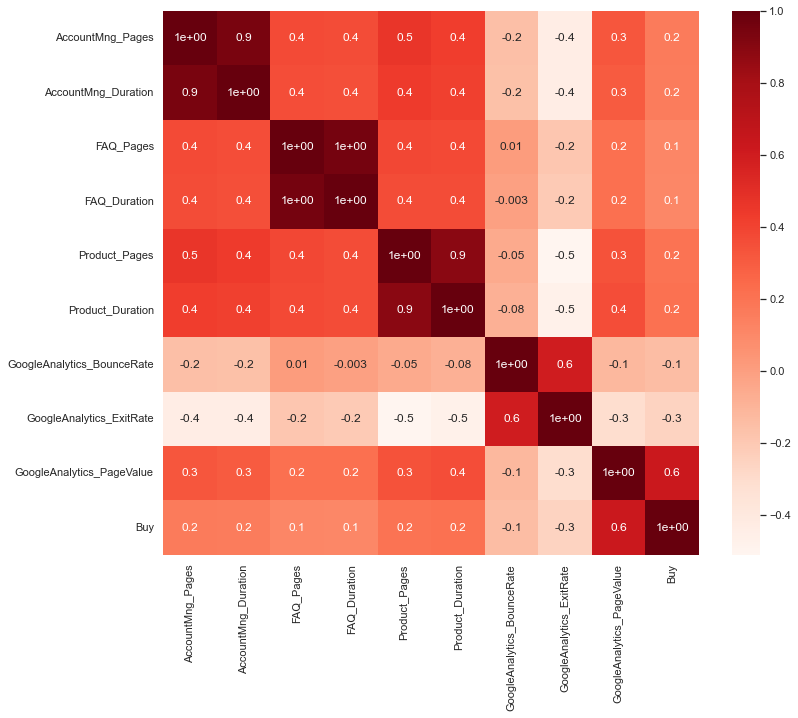

'From this we can conclude that some pairs of variables are highly correlated such as:\nFAQ_Pages and FAQ_Duration, Product_Pages and Product_Duration and also AccountMng_pages and AccountMng_Duration.\nIt could be interesting to remove one within the pairs.\nAlso, even if no variables has present such a big correlation with the target, the variable GoogleAnalytics_PageValue\nhas a 0.6 correlation with the target "Buy" and it could be important to keep this variable in the model\'s dataset.\n\n'

In [37]:
# Calls the function cor_heatmap() to the correlation table cor_spearman
cor_heatmap(cor_spearman)

"""From this we can conclude that some pairs of variables are highly correlated such as:
FAQ_Pages and FAQ_Duration, Product_Pages and Product_Duration and also AccountMng_pages and AccountMng_Duration.
It could be interesting to remove one within the pairs.
Also, even if no variables has present such a big correlation with the target, the variable GoogleAnalytics_PageValue
has a 0.6 correlation with the target "Buy" and it could be important to keep this variable in the model's dataset.

"""

#### Wrapper method: RFE

In [38]:
# create a loop to check the score of the estimator using a different number of features

#no of features
nof_list=np.arange(1,9)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.883000


In [39]:
#Using LogisticRegression, create a Logistic Regression Classifier instance called model
model = LogisticRegression()

In [40]:
# Using RFE, create a RFE instance called rfe and initialize by defining the following parameters
#estimator = model and n_features_to_select = 4
rfe = RFE(estimator = model, n_features_to_select = 4)

In [41]:
# Transform the data using RFE by applying the method fit_transform() to the instance rfe, 
# where X should be assigned to your independent variables and y to the dependent variable and assign it to the object X_rfe
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

In [42]:
X_train_num_scaled.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue'],
      dtype='object')

In [43]:
# Check the variables that were selected by RFE as the most "important" ones by calling the attribute support_ to rfe
rfe.support_

array([False, False, False, False,  True,  True, False,  True,  True])

In [44]:
#Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute ranking_ to rfe.
rfe.ranking_

array([5, 3, 4, 6, 1, 1, 2, 1, 1])

In [45]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
dtype: bool

#### Embedded method: LASSO

In [46]:
# Create a function to plot the importance of the features named plot_importance() that should receive as parameters the "importance" of each variable (coef) and a name to define the title.
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [47]:
#  create a Lasso Regression instance called reg
reg = LassoCV()

# Fit the data to reg by using the method fit() where X should be assigned to data and y to the dependent variable.

reg.fit(X_train_num_scaled, y_train)

LassoCV()

In [48]:
# Create an object (pandas Series) named coef that will have as index the data columns names and the coef_ attribute as value.
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

AccountMng_Pages              0.005262
AccountMng_Duration           0.020773
FAQ_Pages                     0.017999
FAQ_Duration                  0.000000
Product_Pages                 0.037752
Product_Duration              0.109869
GoogleAnalytics_BounceRate    0.025619
GoogleAnalytics_ExitRate     -0.086232
GoogleAnalytics_PageValue     0.874492
dtype: float64

In [49]:
#Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 1 variables


In [50]:
#Sort the values of coef using the method sort_values()
coef.sort_values()

GoogleAnalytics_ExitRate     -0.086232
FAQ_Duration                  0.000000
AccountMng_Pages              0.005262
FAQ_Pages                     0.017999
AccountMng_Duration           0.020773
GoogleAnalytics_BounceRate    0.025619
Product_Pages                 0.037752
Product_Duration              0.109869
GoogleAnalytics_PageValue     0.874492
dtype: float64

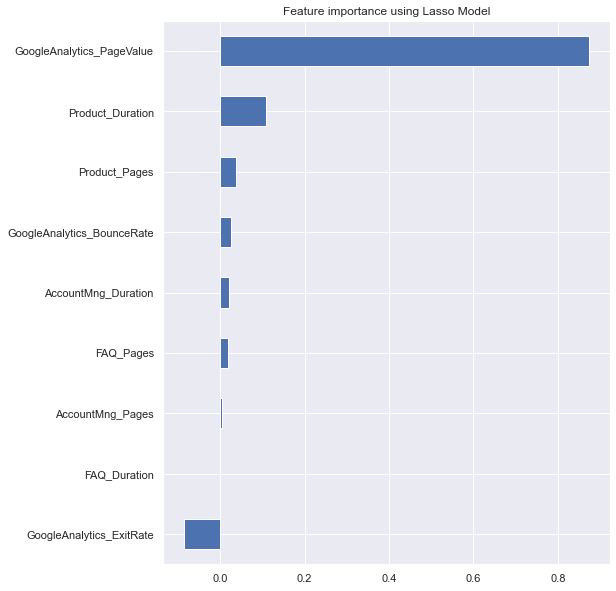

'Using LASSO we can conclude that the only variable we should drop is FAQ_Duration'

In [51]:
# By calling the function plot_importance() that we created on step 15, plot the feature importance of the variables, by passing as parameters the object coef and the name "Lasso"
plot_importance(coef,'Lasso')

"""Using LASSO we can conclude that the only variable we should drop is FAQ_Duration"""

#### Chi-Square for categorical data

In [52]:
#defining Train and Validation dataframes for categorical variables that will be used in Chi-Square analysis
X_train_cat = X_train[categorial_features]
X_val_cat = X_val[categorial_features]
X_test_cat = X_test[categorial_features]

In [53]:
# Create a function named as TestIndependence that should receive as arguments the dataset of independent variables, 
#the target, the name of each independent variable and the alpha defined. 
#This function will follow the steps of chi-square to check if a independent variable is an important predictor.

def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [54]:
#For all the categorical variables available on X_train_cat, call the function TestIndependence.
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)
    
"""According to Chi-Square we should keep only the variables: OS, Type_of_Visitor, Type_of_Traffic and Date """    

OS is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Visitor is IMPORTANT for Prediction
Browser is NOT an important predictor. (Discard Browser from model)
Type_of_Traffic is IMPORTANT for Prediction
Date is IMPORTANT for Prediction


'According to Chi-Square we should keep only the variables: OS, Type_of_Visitor, Type_of_Traffic and Date '

### Conclusion Feature Selection


<hr>

#### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| AccountMng_Pages | Keep | Discard | Keep? | Try with and without |
| AccountMng_Duration | Discard | Discard | Keep ? | Discard |
| FAQ_Pages | Keep | Discard | Keep ?| Try with and without |
| FAQ_Duration | Discard | Discard | Discard | Discard |
| Product_Pages | Keep | Keep | Keep | Include in the model |
| Product_Duration | Discard | Keep | Keep |  Try with and without |
| GoogleAnalytics_BounceRate | Discard | Discard | Keep? |  Discard |
| GoogleAnalytics_ExitRate | Keep? | Keep | Keep |  Include in the model |
| GoogleAnalytics_PageValue | Keep | Keep | Keep |  Include in the model |

<hr>

#### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | Keep |  
| Country | Discard | 
| Type_of_Visitor | Keep|
| Browser | Discard | 
| Type_of_Traffic | Keep | 
| Date | Keep |

<hr>


In [55]:
"""After applying different methods for feature selection we've decided to drop the following variables from the dataset:
numerical: AccountMng_Duration, FAQ_Duration, GoogleAnalytics_BounceRate
categorical: Country, Browser, Date (trying to remove at first)
"""

"After applying different methods for feature selection we've decided to drop the following variables from the dataset:\nnumerical: AccountMng_Duration, FAQ_Duration, GoogleAnalytics_BounceRate\ncategorical: Country, Browser, Date (trying to remove at first)\n"

#### Organizing the data after all the pre-processing methods

In [56]:
# reuniting the numerical and categorial variables into X_train and removing the variables discarded by feature selection
X_train = X_train_num_scaled.join(X_train_cat)
X_train.drop(['AccountMng_Duration','FAQ_Duration','GoogleAnalytics_BounceRate','Country','Browser','Date'], axis = 1, inplace = True)
X_train.head()

,AccountMng_Pages,FAQ_Pages,Product_Pages,Product_Duration,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Type_of_Visitor,Type_of_Traffic
Access_ID,,,,,,,,,
485098673,-0.9,-0.8,-0.773684,-0.849092,-0.527,-1.000000,Android,Returner,3
740418308,-0.9,-1.0,-0.473684,-0.539029,-0.718,-1.000000,Windows,Returner,2
538092603,-0.6,-1.0,-0.836842,-0.787702,-0.884,-0.328641,Windows,Returner,1
105875577,-1.0,-1.0,-0.984211,-0.986933,-0.333,-1.000000,Android,Returner,2
601182749,-1.0,-1.0,-0.952632,-0.954733,-0.861,-1.000000,Android,New_Access,2


In [57]:
# reuniting the numerical and categorial variables into X_val and removing the variables discarded by feature selection
X_val = X_val_num_scaled.join(X_val_cat)
X_val.drop(['AccountMng_Duration','FAQ_Duration','GoogleAnalytics_BounceRate','Country','Browser','Date'], axis = 1, inplace = True)
X_val.head()

,AccountMng_Pages,FAQ_Pages,Product_Pages,Product_Duration,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Type_of_Visitor,Type_of_Traffic
Access_ID,,,,,,,,,
674897518,-1.0,-1.0,-0.968421,-0.996667,0.222,-1.000000,MacOSX,Returner,4
474010534,-0.9,-1.0,-0.921053,-0.949667,-0.980,-0.179845,Ubuntu,Other,15
242890588,-0.5,-0.8,-0.847368,-0.798053,-0.709,-1.000000,MacOSX,Returner,6
390265745,-1.0,-1.0,-0.936842,-0.915767,-0.273,-0.105233,Android,Returner,3
430925192,-0.5,-0.6,-0.784211,-0.819269,-0.929,-1.000000,Android,Returner,2


In [58]:
# reuniting the numerical and categorial variables into X_est and removing the variables discarded by feature selection
X_test = X_test_num_scaled.join(X_test_cat)
X_test.drop(['AccountMng_Duration','FAQ_Duration','GoogleAnalytics_BounceRate','Country','Browser','Date'], axis = 1, inplace = True)
X_test.head()

,AccountMng_Pages,FAQ_Pages,Product_Pages,Product_Duration,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Type_of_Visitor,Type_of_Traffic
Access_ID,,,,,,,,,
798519314,-1.0,-1.0,-0.547368,-0.288994,-0.346,-1.00000,Windows,Returner,1
798663101,-0.8,-1.0,-0.710526,-0.810604,-0.942,-1.00000,Android,Returner,4
798663221,-1.0,-1.0,-0.810526,-0.894867,-0.750,-1.00000,Windows,Returner,3
798760918,-1.0,-1.0,-0.989474,-0.908133,0.000,-1.00000,Windows,New_Access,2
798856982,0.2,-0.8,-0.321053,-0.551061,-0.815,-0.98782,Windows,Returner,10


In [59]:
## Define metric and non-metric features after all transformations
non_metric_features = ['OS','Type_of_Visitor','Type_of_Traffic']
metric_features = X_train.columns.drop(non_metric_features).to_list()

<hr>
<a class="anchor" id="encoding">
    
## 3.3 One-Hot Encoding
    
</a>

In [60]:
#creating a copy the X_train and X_val datasets to apply the one-hot encoding methods in its categorical variables
df_ohc_X_train = X_train.copy()

df_ohc_X_val = X_val.copy()

df_ohc_X_test = X_test.copy()

In [61]:
# Use OneHotEncoder to encode the categorical features in X_train dataset

ohc = OneHotEncoder(sparse=False, drop="first")

#fit the OHC into the categorical features
ohc_feat = ohc.fit_transform(df_ohc_X_train[non_metric_features])

#Get feature names and create a DataFrame 
ohc_feat_names = ohc.get_feature_names()

# with the one-hot encoded categorical features (pass feature names)
df_ohc_X_train = pd.DataFrame(ohc_feat, index=df_ohc_X_train.index, columns=ohc_feat_names) 

df_ohc_X_train 

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_Other,x1_Returner,x2_2,...,x2_6,x2_7,x2_8,x2_9,x2_10,x2_11,x2_12,x2_13,x2_14,x2_15
Access_ID,,,,,,,,,,,,,,,,,,,,,
485098673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
740418308,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538092603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105875577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601182749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412753815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601178452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168625548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Use OneHotEncoder to encode the categorical features in X_val dataset

ohc = OneHotEncoder(sparse=False, drop="first")

#fit the OHC into the categorical features
ohc_feat = ohc.fit_transform(df_ohc_X_val[non_metric_features])

#Get feature names and create a DataFrame 
ohc_feat_names = ohc.get_feature_names()

# with the one-hot encoded categorical features (pass feature names)
df_ohc_X_val = pd.DataFrame(ohc_feat, index=df_ohc_X_val.index, columns=ohc_feat_names) 

df_ohc_X_val

,x0_Chrome OS,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_Other,x1_Returner,x2_2,x2_3,...,x2_6,x2_7,x2_8,x2_9,x2_10,x2_11,x2_12,x2_13,x2_14,x2_15
Access_ID,,,,,,,,,,,,,,,,,,,,,
674897518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474010534,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
242890588,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390265745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430925192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386074040,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380324469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419757149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Use OneHotEncoder to encode the categorical features in X_test dataset

ohc = OneHotEncoder(sparse=False, drop="first")

#fit the OHC into the categorical features
ohc_feat = ohc.fit_transform(df_ohc_X_test[non_metric_features])

#Get feature names and create a DataFrame 
ohc_feat_names = ohc.get_feature_names()

# with the one-hot encoded categorical features (pass feature names)
df_ohc_X_test = pd.DataFrame(ohc_feat, index=df_ohc_X_test.index, columns=ohc_feat_names) 

df_ohc_X_test 

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_Other,x1_Returner,x2_2,...,x2_6,x2_7,x2_8,x2_9,x2_10,x2_11,x2_12,x2_13,x2_14,x2_15
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798663101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798663221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798760918,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798856982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962042726,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962063064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962147749,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
# Reassigning the X_train and X_val datasets to contain the variables transformed by OHC

# X_train
X_train = pd.concat([X_train.drop(columns=non_metric_features), df_ohc_X_train], axis=1)


# X_val
X_val = pd.concat([X_val.drop(columns=non_metric_features), df_ohc_X_val], axis=1)

# X_test
X_test = pd.concat([X_test.drop(columns=non_metric_features), df_ohc_X_test], axis=1)


In [65]:
# comparing columns from Train and Val dataset to check if there is a missing column between them
X_train_columns = set(X_train.columns)
X_val_columns = set(X_val.columns)

set_difference = X_train_columns - X_val_columns
list_difference = list(set_difference)

#shows the columns that should be removed, since they aren't present in both datasets
list_difference

['x0_Fedora']

In [66]:
# comparing columns from Train and Val dataset to check if there is a missing column between them
X_train_columns = set(X_train.columns)
X_test_columns = set(X_test.columns)

set_difference = X_train_columns - X_test_columns
list_difference = list(set_difference)

#shows the columns that should be removed, since they aren't present in both datasets
list_difference

[]

In [67]:
#removing variable/column x0_Fedora from the X_train dataset
X_train.drop(columns=['x0_Fedora'], axis = 1, inplace = True)
X_test.drop(columns=['x0_Fedora'], axis = 1, inplace = True)
X_train.columns

Index(['AccountMng_Pages', 'FAQ_Pages', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'x0_Chrome OS',
       'x0_MacOSX', 'x0_Other', 'x0_Ubuntu', 'x0_Windows', 'x0_iOS',
       'x1_Other', 'x1_Returner', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6',
       'x2_7', 'x2_8', 'x2_9', 'x2_10', 'x2_11', 'x2_12', 'x2_13', 'x2_14',
       'x2_15'],
      dtype='object')

In [68]:
# comparing columns from Train and Val dataset to check if there is a missing column between them
X_train_columns = set(X_train.columns)
X_val_columns = set(X_val.columns)

set_difference = X_train_columns - X_val_columns
list_difference = list(set_difference)

#shows the columns that should be removed, since they aren't present in both datasets
list_difference

"""no more differences between the X_train and X_val datasets"""

'no more differences between the X_train and X_val datasets'

In [69]:
#datasets after pre-processing steps
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(6999, 28)
(6999,)
(2300, 28)


<hr>
<a class="anchor" id="model">
    
# 4.0 Model Selection
    
</a>

###  K-Fold

<hr>
<a class="anchor" id="lr">
    
## 4.1 Logistic Regression
    
</a>

In [70]:
#creates an instance (using only the numerical variables)

log_model = LogisticRegression()

#Fit the model to the train data
log_model.fit(X_train, y_train)

LogisticRegression()

In [71]:
#Use the model to predict the labels of the validation dataset. Assign them to y_pred.
y_pred = log_model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
#get the actual probabilities of each sample instead of the assigned class using the method predict_proba()
pred_prob = log_model.predict_proba(X_val)
pred_prob

array([[0.98987638, 0.01012362],
       [0.03711802, 0.96288198],
       [0.94240638, 0.05759362],
       ...,
       [0.99252907, 0.00747093],
       [0.95721984, 0.04278016],
       [0.69751133, 0.30248867]])

In [73]:
#get the coefficients and intercept
log_model.coef_

array([[ 6.22049719e-03,  1.44967118e-01,  3.54502027e-01,
         8.27209804e-01, -1.66630460e+00,  6.41323625e+00,
        -1.00938138e+00, -2.11031955e-01,  5.41364020e-01,
        -7.95220403e-03, -2.84480322e-02, -3.40923231e-01,
        -4.12480539e-01, -1.08183258e-01,  1.97779036e-01,
        -1.78423755e-01, -2.18234379e-01,  2.84834605e-01,
        -2.21192307e-01,  4.21474837e-01,  8.27553534e-01,
        -4.26146251e-01,  6.34503140e-01,  6.97239555e-01,
        -7.59337019e-01, -8.13681876e-01, -2.75184034e-01,
         4.02478943e-01]])

#### Model Assessment - Logistic Regression

#### Confusion Matrix

In [74]:
"""Since we are predicting a categorical target (classification) we use other metrics to evaluate our model 
than if we were solving a regression problem. Also, for the logistic regression the R-squared cannot be obtained 
in the same way as we obtain it in the linear case."""

#Compute confusion matrix to evaluate the accuracy of a classification

cm = confusion_matrix(y_val, y_pred)
cm

array([[2474,   60],
       [ 287,  179]], dtype=int64)

The confusion matrix in sklearn is presented in the following format: <br>
[ [ TN  FP  ] <br>
    [ FN  TP ] ]

#### Accuracy score

In [75]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.8843333333333333

#### Precision

In [76]:
precision = precision_score(y_val, y_pred)
precision

0.7489539748953975

#### Recall

In [77]:
recall_score(y_val, y_pred)

0.38412017167381973

#### F1 Score

In [78]:
f1 = f1_score(y_val, y_pred)
f1

0.5078014184397163

#### Testing the Logistic Regression  Model in the Test dataset

In [79]:
#creates an instance (using only the numerical variables)

log_model = LogisticRegression()

#Fit the model to the train data
log_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
#Use the model to predict the labels of the validation dataset. Assign them to y_pred.
y_pred_LR = log_model.predict(X_val)
y_pred_LR

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
y_test_LR = log_model.predict(X_test)
y_test_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
y_test_LR = pd.DataFrame(y_test_LR, index=X_test.index, columns=['Buy'])
y_test_LR

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,0


In [83]:
y_test_LR.value_counts()

Buy
0      2139
1       161
dtype: int64

In [84]:
#y_test_LR.to_csv('Group09__Version04.csv')

In [85]:
"""f1-score of 0.5078 for Log Regression"""

'f1-score of 0.5078 for Log Regression'

<hr>
<a class="anchor" id="dt">
    
## 4.2 Decision Tree
    
</a>

In [86]:
# Create an instance of DecisionTreeClassifier with the default parameters and name it as dt_gini
dt_gini = DecisionTreeClassifier()

#Fit your data to the model dt_gini
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier()

In [87]:
# Check the predicted values for the test dataset using the method predict() in your model
y_pred_gini = dt_gini.predict(X_val)
y_pred_gini

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
#Check the predicted class probabilities for the test dataset using the method predict_proba() in your model
y_pred_gini_prob = dt_gini.predict_proba(X_val)
y_pred_gini_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [89]:
#Check the depth (get_depth()), the number of nodes (.tree_.node_count) and the number of leaves (get_n_leaves()) of the model dt_gini

print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

"""initially using a Decision Tree without parameters: it seems overfitting given the depth, nodes and leaves"""

The defined three has a depth of 26, 1423 nodes and a total of 712 leaves.


'initially using a Decision Tree without parameters: it seems overfitting given the depth, nodes and leaves'

In [90]:
#Computes confusion matrix to evaluate the accuracy of the decision tree dt_gini
cm_dt_gini = confusion_matrix(y_val, y_pred_gini)
cm_dt_gini

array([[2290,  244],
       [ 205,  261]], dtype=int64)

In [91]:
#calculates the accuracy for the decision tree dt_gini
accuracy_dt_gini = accuracy_score(y_val, y_pred_gini)
accuracy_dt_gini

0.8503333333333334

In [92]:
#calculates the F1 Score for the decision tree dt_gini
f1_dt_gini = f1_score(y_val, y_pred_gini)
f1_dt_gini

"""f1-score of 0.5480 for Decision Tree with default parameters"""

'f1-score of 0.5480 for Decision Tree with default parameters'

#### Plotting the the ROC Curve for Classification Trees

In [93]:
#creating four different decision tree classifiers defining different parameters
modelDT = DecisionTreeClassifier().fit(X_train, y_train)
modelDT_entropy = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
modelDT_maxdepth3 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
modelDT_leafs8 = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)

In [94]:
#Using the .predict_proba() method of each model created above to obtain the probability estimates for the X_val
#assigning the results to the variables below

prob_modelDT = modelDT.predict_proba(X_val)
prob_modelDT_entropy =  modelDT_entropy.predict_proba(X_val)
prob_modelDT_maxdepth3 =  modelDT_maxdepth3.predict_proba(X_val)
prob_modelDT_leafs8 =  modelDT_leafs8.predict_proba(X_val)

In [95]:
#calling the roc_curve metric and assign the parameters y_true equal to y_val and y_score equal to prob_modelDT[:, 1]. 
#Assign the results to fpr_DT, tpr_DT, thresholds_DT.

fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_val, prob_modelDT[:,1])
fpr_DT_ent, tpr_DT_ent, thresholds_DT_ent = roc_curve(y_val, prob_modelDT_entropy[:,1])
fpr_DT_depth3, tpr_DT_depth3, thresholds_DT_depth3 = roc_curve(y_val, prob_modelDT_maxdepth3[:,1])
fpr_DT_leafs8, tpr_DT_leafs8, thresholds_DT_leafs8 = roc_curve(y_val, prob_modelDT_leafs8[:,1])

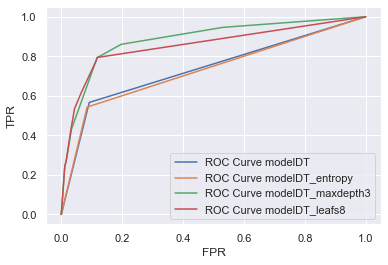

'the higher the area under the curve (AUC) the better the model would be'

In [96]:
#plot the roc curve associated to each model

plt.plot(fpr_DT, tpr_DT,label="ROC Curve modelDT")
plt.plot(fpr_DT_ent, tpr_DT_ent, label="ROC Curve modelDT_entropy")
plt.plot(fpr_DT_depth3, tpr_DT_depth3, label="ROC Curve modelDT_maxdepth3")
plt.plot(fpr_DT_leafs8, tpr_DT_leafs8, label="ROC Curve modelDT_leafs8")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()
"""the higher the area under the curve (AUC) the better the model would be"""
# Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1 
#https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

#### Plotting the precision recall curve associated to the best model obtained in the ROC Curve



Best Threshold=0.435239, F-Score=0.652


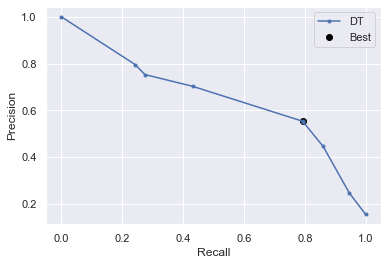

In [97]:
#Get the precision, the recall and the thresholds from your precision recall curve
precision, recall, thresholds = precision_recall_curve(y_val, prob_modelDT_maxdepth3[:,1])

#Check what is the threshold for the best f1 score
# apply f1 score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

#Plot the precision recall curve and the best threshold.
plt.plot(recall, precision, marker='.', label='DT')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#### Using the best model selected from roc curve

In [98]:
modelDT_maxdepth3 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [99]:
y_pred_maxdepth3 =  modelDT_maxdepth3.predict(X_val)
y_pred_maxdepth3

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
f1_score_dt_maxdepth3 = f1_score(y_val, y_pred_maxdepth3)

In [101]:
f1_score_dt_maxdepth3
"""f1-score of 0.5345 for modelDT_maxdepth3 """

'f1-score of 0.5345 for modelDT_maxdepth3 '

In [102]:
#exploring the changes in threshold
#modelDT_maxdepth3.tree_.threshold

#### Using the GridSearch to find the best parameters for the Decision Tree classifier

In [103]:
#Defines a dictionary named as parameter_space and define the following options to be considered during modelling:
parameter_space = {
    'max_depth': [2,3,4,5,6],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8, None],
    'max_leaf_nodes': [4,8,12, None]
}

In [104]:
#Creates an instance of GridSearchCV named as clf and pass as parameters the model and the parameter_space
clf = GridSearchCV(modelDT, parameter_space, scoring = 'f1')

#Fits the instanced "clf" to X_train and y_train
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'splitter': ['random', 'best']},
             scoring='f1')

In [105]:
#Calling the attribute best_params_ to check which is the best combination of parameters
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 6,
 'max_leaf_nodes': 4,
 'splitter': 'best'}

In [106]:
#Creating an instance of DecisionTreeClassifier with the parameters obtained in GridSearch and naming it as dt_final
dt_final = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, splitter = 'best', 
                                  max_features = None, max_leaf_nodes = 8)

#Fit the data to the model dt_final instanced
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

In [107]:
#checking the predictions for the values in the X_val dataset using .predict()
y_pred_dt_final = dt_final.predict(X_val)
y_pred_dt_final

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
#calculates the F1 Score for the decision tree dt_final
f1_dt_final = f1_score(y_val, y_pred_dt_final)
f1_dt_final
'''f1-Score for DT obtained from GridSearch  = 0.6063'''

'f1-Score for DT obtained from GridSearch  = 0.6063'

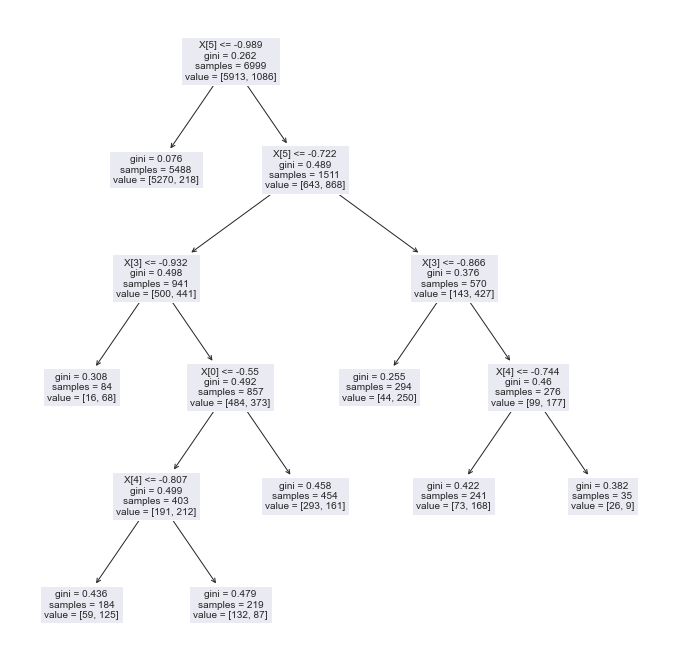

In [109]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#calling the method plot_tree from sklearn to plot the decision tree dt_final
tree.plot_tree(dt_final, fontsize=10)

plt.show()

#### Applying Feature Importance using criteria Gini and Entropy to select the better features

In [110]:
#Calculate the feature importance using the split criteria 'Gini' and 'Entropy'
gini_importance = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_


"we can observe a set of features with gini and entropy equals zero, \nwhich means that they probably don't add any importance for the classification. We could try removing this features"

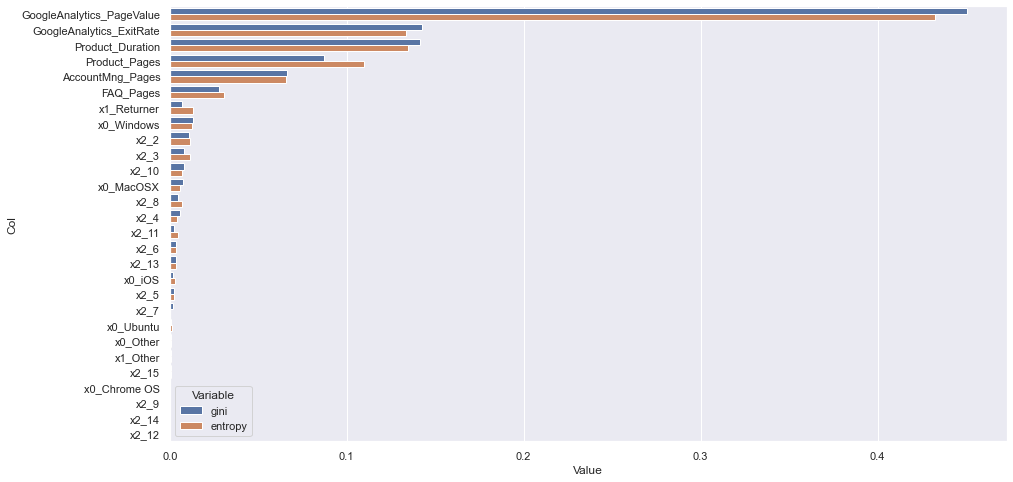

In [111]:
#Plot the feature importances for both criterions
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

"""we can observe a set of features with gini and entropy equals zero, 
which means that they probably don't add any importance for the classification. We could try removing this features"""

In [112]:
#creating new dataframes from X_train and X_val to test a different decision tree classifier
X_train_dt = X_train.copy()
X_val_dt = X_val.copy()

In [113]:
#creating a list with the features that should be removed from the dataset
features_to_drop = ['x2_12','x2_14','x2_9','x2_15','x1_Other','x0_Chrome OS','x0_Other','x2_7','x0_Ubuntu']

In [114]:
#removing the features with low importance to the model to get a new decision tree and check if the results would improve
X_train_dt.drop(features_to_drop, axis = 1, inplace = True)
X_val_dt.drop(features_to_drop, axis = 1, inplace = True)

In [115]:
#Creating an instance of DecisionTreeClassifier with the parameters obtained in GridSearch and naming it as dt_final
dt_final2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, splitter = 'best', 
                                  max_features = None, max_leaf_nodes = 8)

#Fit the data to the model dt_final instanced
dt_final2.fit(X_train_dt, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8)

In [116]:
#checking the predictions for the values in the X_val_dt dataset using .predict()
y_pred_dt_final2 = dt_final2.predict(X_val_dt)
y_pred_dt_final2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
#calculates the F1 Score for the decision tree dt_final
f1_dt_final2 = f1_score(y_val, y_pred_dt_final2)
f1_dt_final2
'''f1-score of 0.6036 obtained after applying feature importance in the decision tree'''

'f1-score of 0.6036 obtained after applying feature importance in the decision tree'

#### Using the model Decision Tree in the Test Dataset

In [118]:
X_test_drop = X_test.copy()

In [119]:
X_test_drop.drop(features_to_drop, axis = 1, inplace = True)

In [120]:
X_test_drop.shape

(2300, 19)

In [121]:
#checking the predictions for the values in the X_val_dt dataset using .predict()
y_pred_test = dt_final2.predict(X_test_drop)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
y_pred_dt_test = pd.DataFrame(y_pred_test, index=X_test_drop.index, columns=['Buy']) 

In [123]:
y_pred_dt_test.value_counts()

Buy
0      2031
1       269
dtype: int64

In [124]:
y_pred_dt_test.head()

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0


In [125]:
#test predictions dataframe to CSV
#y_pred_dt_test.to_csv('Group09__Version05.csv')

##### Testing Max_features DT

In [126]:
#Creating an instance of DecisionTreeClassifier with the parameters obtained in GridSearch and naming it as dt_final
dt_max_features = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, splitter = 'best', 
                                  max_features = 8, max_leaf_nodes = 8, min_samples_split = 5, random_state = 10)

#Fit the data to the model dt_final instanced
dt_max_features.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, max_leaf_nodes=8,
                       min_samples_split=5, random_state=10)

In [127]:
#checking the predictions for the values in the X_val dataset using .predict() 
y_pred_dt_max_ft = dt_max_features.predict(X_val)
y_pred_dt_max_ft

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
#calculates the F1 Score for the decision tree dt_final
f1_dt_max_ft = f1_score(y_val, y_pred_dt_max_ft)
f1_dt_max_ft
"""f1-socre of 0.6239 obtained after the change in the number of min_samples_split and max_depth 5, preserving a random state"""

'f1-socre of 0.6239 obtained after the change in the number of min_samples_split and max_depth 5, preserving a random state'

In [129]:
#Confusion matrix for the best model decision tree
cmbestDT = confusion_matrix(y_val, y_pred_dt_max_ft)
cmbestDT

array([[2420,  114],
       [ 203,  263]], dtype=int64)

In [130]:
#checking the predictions for the values in the X_val dataset using .predict()
y_pred_test_dt_max_ft = dt_max_features.predict(X_test)
y_pred_test_dt_max_ft

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
y_pred_test_dt_max_ft = pd.DataFrame(y_pred_test_dt_max_ft, index=X_test.index, columns=['Buy']) 
y_pred_test_dt_max_ft.value_counts()

Buy
0      2031
1       269
dtype: int64

In [132]:
#test predictions y_pred_test_dt_max_ft dataframe to CSV
#y_pred_test_dt_max_ft.to_csv('Group09__Version06.csv')

<hr>
<a class="anchor" id="bayes">
    
## 4.3 Naive Bayes Classifier
    
</a>

In [133]:
#create a Naive Bayes classifier instance called modelNB.
modelNB = GaussianNB(var_smoothing=0.0001)

In [134]:
#fit the model into the dataset
modelNB.fit(X = X_train, y = y_train)

GaussianNB(var_smoothing=0.0001)

In [135]:
y_predict_bayes = modelNB.predict(X_val)

In [136]:
f1_score_bayes = f1_score(y_val, y_predict_bayes)
f1_score_bayes

0.45745992601726254

In [137]:
labels_test = modelNB.predict(X_test)
labels_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [138]:
labels_test = pd.DataFrame(labels_test, index=X_test.index, columns=['Buy']) 

In [139]:
#labels_test.to_csv('Group09__Version02.csv')

<hr>
<a class="anchor" id="knn">
    
## 4.4 K-Nearest Neighbors
    
</a>

In [140]:
numberK_list=np.arange(1,21)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 6
Mean accuracy in train with 6 neighbors: 0.891413
Mean accuracy in validation with 6 neighbors: 0.876333


In [141]:
modelKNN = KNeighborsClassifier(n_neighbors = 6).fit(X = X_train, y= y_train)

In [142]:
y_predict_KNN = modelKNN.predict(X_val)
y_predict_KNN

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
f1_score_KNN = f1_score(y_val, y_predict_KNN)
f1_score_KNN
#f1-score for KNN is 0.4454

0.445440956651719

In [144]:
cmKNN = confusion_matrix(y_val, y_predict_KNN)
cmKNN

array([[2480,   54],
       [ 317,  149]], dtype=int64)

  <hr>
<a class="anchor" id="bagging">
    
## 4.5 Balanced Bagging Classifier + Trees
    
</a>
 

In [145]:
#creating object for decision tree classifier
tree = DecisionTreeClassifier()

#creating bagging classifier composed by decision tree
bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 100, bootstrap = True, random_state = 5, n_jobs = -1)

#fits the model to the train data
bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=5)

In [146]:
y_bagging_tree_predict = bagging_tree.predict(X_val)
y_bagging_tree_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
f1_score_bagging_tree = f1_score(y_val, y_bagging_tree_predict)
f1_score_bagging_tree

0.6157517899761336

In [148]:
cm_bagging_tree = confusion_matrix(y_val, y_bagging_tree_predict)
cm_bagging_tree

array([[2420,  114],
       [ 208,  258]], dtype=int64)

In [149]:
test_preditct_bagging_tree = bagging_tree.predict(X_test)
test_preditct_bagging_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
labes_bagging_tree = pd.DataFrame(test_preditct_bagging_tree, index=X_test.index, columns=['Buy']) 

In [151]:
# labes_bagging_tree.to_csv('Group09__Version10.csv')

<hr>
<a class="anchor" id="rf">
    
## 4.6 Random Forest
    
</a>

In [152]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_val)

In [153]:
#run cross-validation to get a better overview of the results
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [154]:
#print out the results
print("=== Confusion Matrix ===")
print(confusion_matrix(y_val, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_val, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[2434  100]
 [ 212  254]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2534
           1       0.72      0.55      0.62       466

    accuracy                           0.90      3000
   macro avg       0.82      0.75      0.78      3000
weighted avg       0.89      0.90      0.89      3000



=== All AUC Scores ===
[nan nan nan nan nan nan nan nan nan nan]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  nan


In [155]:
f1_score_RandomForest = f1_score(y_val, rfc_predict)
f1_score_RandomForest

0.6195121951219512

In [156]:
predict_rfc_test = rfc.predict(X_test)
predict_rfc_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [157]:
labes_rfc_test1 = pd.DataFrame(predict_rfc_test, index=X_test.index, columns=['Buy']) 

In [158]:
# labes_rfc_test1.to_csv('Group09__Version10.csv')

#### Tunning the Random Forest using  RandomizedSearchCV

Based on William Koehrsen’s article, “Hyperparameter Tuning the Random Forest in Python”, We’ll use RandomizedSearchCV from sklearn to optimize our hyperparamaters. Koehrsen uses a full grid of hyperparameters in his article, but I found that this could take a very substantial time to run in practice. I decided to focus on 3 hyperparameters: n_estimators, max_features, and max_depth.

In [159]:
rfc_search = RandomForestClassifier()

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc_search, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 82, 'max_features': 'auto', 'max_depth': 9}


In [160]:
rfc_tunned = RandomForestClassifier(n_estimators=100, max_depth=9, max_features='auto', min_samples_split=10, random_state = 15)

rfc_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=15)

In [161]:
rfc_tunned_predict = rfc_tunned.predict(X_val)

In [162]:
f1_score_rfc_tunned = f1_score(y_val, rfc_tunned_predict)
f1_score_rfc_tunned

0.6311787072243347

In [163]:
cm_rfc_tunned = confusion_matrix(y_val, rfc_tunned_predict)
cm_rfc_tunned

array([[2460,   74],
       [ 217,  249]], dtype=int64)

In [164]:
predict_rfc_tunned = rfc_tunned.predict(X_test)
predict_rfc_tunned

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [165]:
labes_rfc_tunned_test1 = pd.DataFrame(predict_rfc_tunned, index=X_test.index, columns=['Buy']) 

In [166]:
# labes_rfc_tunned_test1.to_csv('Group09__Version09.csv')

<hr>
<a class="anchor" id="svm">
    
## 4.7 Support Vector Machine Classifier (SVMs)
    
</a>

In [167]:
modelSVM = SVC(kernel = 'rbf', gamma = 'scale',random_state=10, probability = True, C=50).fit(X_train, y_train)

In [168]:
modelSVM_predict = modelSVM.predict(X_val)

In [169]:
f1_score_modelSVM_predict = f1_score(y_val, modelSVM_predict)
f1_score_modelSVM_predict

0.5736235595390525

In [170]:
cm_modelSVM = confusion_matrix(y_val, modelSVM_predict)
cm_modelSVM

array([[2443,   91],
       [ 242,  224]], dtype=int64)

  <hr>
<a class="anchor" id="imbalanced">
    
# 5.0 Imbalanced Classification Techniques
    
</a>

  <hr>
<a class="anchor" id="smote">
    
## 5.1 SMOTE - Synthetic Minority Oversampling Technique
    
</a>

In [171]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [172]:
np.bincount(y_res)

array([5913, 5913], dtype=int64)

#### Logistic Regression after SMOTE

In [173]:
smote_LR = LogisticRegression(random_state=0)

#Fitting the training data
smote_LR.fit(X_res, y_res)

#Predicting on test
y_pred1=smote_LR.predict(X_val)

print(confusion_matrix(y_val, y_pred1))
print(classification_report(y_val, y_pred1))

[[2274  260]
 [ 118  348]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2534
           1       0.57      0.75      0.65       466

    accuracy                           0.87      3000
   macro avg       0.76      0.82      0.79      3000
weighted avg       0.89      0.87      0.88      3000



In [174]:
f1_score_smote_LR = f1_score(y_val, y_pred1)
f1_score_smote_LR

0.6480446927374302

In [175]:
test_smote_LR = smote_LR.predict(X_test)
test_smote_LR

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [176]:
labes_test_smote_LR = pd.DataFrame(test_smote_LR, index=X_test.index, columns=['Buy']) 

In [177]:
# labes_test_smote_LR.to_csv('Group09__Version11.csv')

#### Decision Tree after SMOTE

In [178]:
#Creates an instance of GridSearchCV named as clf and pass as parameters the model and the parameter_space
modelDTsmote = DecisionTreeClassifier()

clf = GridSearchCV(modelDTsmote, parameter_space, scoring = 'f1')

#Fits the instanced "clf" to X_train and y_train
clf.fit(X_res, y_res)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'splitter': ['random', 'best']},
             scoring='f1')

In [179]:
#Calling the attribute best_params_ to check which is the best combination of parameters
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'splitter': 'best'}

In [180]:
smote_DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, splitter='best', max_features= None, 
                                  max_leaf_nodes= None )


#Fit the data oversampled to the model smote_DT instanced
smote_DT.fit(X_res, y_res)


#Predicting on test
y_pred_DT=smote_DT.predict(X_val)

print(confusion_matrix(y_val, y_pred_DT))
print(classification_report(y_val, y_pred_DT))

[[2244  290]
 [  95  371]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2534
           1       0.56      0.80      0.66       466

    accuracy                           0.87      3000
   macro avg       0.76      0.84      0.79      3000
weighted avg       0.90      0.87      0.88      3000



In [181]:
f1_score_smote_DT = f1_score(y_val, y_pred_DT)
f1_score_smote_DT

0.6583850931677019

In [182]:
test_smote_DT = smote_DT.predict(X_test)


labes_test_smote_DT = pd.DataFrame(test_smote_DT, index=X_test.index, columns=['Buy']) 


# labes_test_smote_DT.to_csv('Group09__Version16.csv')

#### Balanced bagging after SMOTE

In [183]:
#creating object for decision tree classifier
tree = DecisionTreeClassifier()

#creating bagging classifier composed by decision tree
bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 100, bootstrap = True, random_state = 5, n_jobs = -1)

#fits the model to the train data
bagging_tree.fit(X_res, y_res)

#Predicting on test
y_pred_bc = bagging_tree.predict(X_val)

print(confusion_matrix(y_val, y_pred_bc))
print(classification_report(y_val, y_pred_bc))


[[2287  247]
 [ 139  327]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2534
           1       0.57      0.70      0.63       466

    accuracy                           0.87      3000
   macro avg       0.76      0.80      0.78      3000
weighted avg       0.88      0.87      0.88      3000



In [184]:
y_bagging_tree_predict = bagging_tree.predict(X_val)
y_bagging_tree_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [185]:
f1_score_bagging_tree = f1_score(y_val, y_bagging_tree_predict)
f1_score_bagging_tree

0.6288461538461538

#### Random Forest after SMOTE

In [186]:
rfc_smote = RandomForestClassifier(n_estimators=100, random_state = 10)


#Fitting the training data
rfc_smote.fit(X_res, y_res)

#Predicting on test
y_pred_rfc_smote=rfc_smote.predict(X_val)

print(confusion_matrix(y_val, y_pred_rfc_smote))
print(classification_report(y_val, y_pred_rfc_smote))

[[2285  249]
 [ 117  349]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2534
           1       0.58      0.75      0.66       466

    accuracy                           0.88      3000
   macro avg       0.77      0.83      0.79      3000
weighted avg       0.89      0.88      0.88      3000



In [187]:
f1_score_smote_rfc = f1_score(y_val, y_pred_rfc_smote)
f1_score_smote_rfc

0.6560150375939849

In [188]:
test_smote_rfc = rfc_smote.predict(X_test)


labes_test_smote_rfc = pd.DataFrame(test_smote_rfc, index=X_test.index, columns=['Buy']) 


# labes_test_smote_rfc.to_csv('Group09__Version18.csv')

#### SVM after SMOTE

In [189]:
#creating SVM classifier
modelSVM = SVC(kernel = 'rbf', gamma = 'scale',random_state=10, probability = True, C=50)


#fits the model to the train data
modelSVM.fit(X_res, y_res)

y_modelSVM_predict = modelSVM.predict(X_val)

print(confusion_matrix(y_val, y_modelSVM_predict))
print(classification_report(y_val, y_modelSVM_predict))

[[2259  275]
 [ 141  325]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2534
           1       0.54      0.70      0.61       466

    accuracy                           0.86      3000
   macro avg       0.74      0.79      0.76      3000
weighted avg       0.88      0.86      0.87      3000



In [190]:
f1_score_modelSVM_predict = f1_score(y_val, y_modelSVM_predict)
f1_score_modelSVM_predict

0.6097560975609757

  <hr>
<a class="anchor" id="adasyn">
    
## 5.2 ADASYN - Adaptive Synthetic Oversampling
    
</a>

In [191]:
from imblearn.over_sampling import ADASYN

In [192]:
# define pipeline
adasyn = ADASYN(sampling_strategy='minority', random_state=15, n_neighbors=5)
X_ad, y_ad = adasyn.fit_resample(X_train, y_train)

#### Logistic Regression after ADASYN

In [193]:
adasyn_LR = LogisticRegression(random_state=0)

#Fitting the training data
adasyn_LR.fit(X_ad, y_ad)

#Predicting on test
y_pred_adasyn = adasyn_LR.predict(X_val)

print(confusion_matrix(y_val, y_pred_adasyn))
print(classification_report(y_val, y_pred_adasyn))

[[2198  336]
 [ 102  364]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2534
           1       0.52      0.78      0.62       466

    accuracy                           0.85      3000
   macro avg       0.74      0.82      0.77      3000
weighted avg       0.89      0.85      0.87      3000



#### Decision Tree after ADASYN

In [194]:
#Creates an instance of GridSearchCV named as clf and pass as parameters the model and the parameter_space
modelDTadasyn = DecisionTreeClassifier()

clf = GridSearchCV(modelDTadasyn, parameter_space, scoring = 'f1')

#Fits the instanced "clf" to X_train and y_train
clf.fit(X_ad, y_ad)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'splitter': ['random', 'best']},
             scoring='f1')

In [195]:
#Calling the attribute best_params_ to check which is the best combination of parameters
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 4,
 'splitter': 'best'}

In [196]:
adasyn_DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, splitter='best', max_features= None, 
                                  max_leaf_nodes= 4 )


#Fit the data oversampled to the model smote_DT instanced
adasyn_DT.fit(X_ad, y_ad)


#Predicting on test
y_pred_DT_ad = adasyn_DT.predict(X_val)

print(confusion_matrix(y_val, y_pred_DT_ad))
print(classification_report(y_val, y_pred_DT_ad))

[[2230  304]
 [  90  376]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2534
           1       0.55      0.81      0.66       466

    accuracy                           0.87      3000
   macro avg       0.76      0.84      0.79      3000
weighted avg       0.90      0.87      0.88      3000



In [197]:
f1_score_adasyn_DT = f1_score(y_val, y_pred_DT_ad)
f1_score_adasyn_DT

0.6561954624781849

In [198]:
test_adasyn_DT = adasyn_DT.predict(X_test)


labes_test_adasyn_DT = pd.DataFrame(test_adasyn_DT, index=X_test.index, columns=['Buy']) 


# labes_test_adasyn_DT.to_csv('Group09__Version19.csv')

#### Balanced Bagging after ADASYN

In [199]:
#creating object for decision tree classifier
tree = DecisionTreeClassifier()

#creating bagging classifier composed by decision tree
bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 100, bootstrap = True, random_state = 5, n_jobs = -1)

#fits the model to the train data
bagging_tree.fit(X_ad, y_ad)

#Predicting on test
y_pred_bc = bagging_tree.predict(X_val)

print(confusion_matrix(y_val, y_pred_bc))
print(classification_report(y_val, y_pred_bc))


[[2285  249]
 [ 140  326]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2534
           1       0.57      0.70      0.63       466

    accuracy                           0.87      3000
   macro avg       0.75      0.80      0.77      3000
weighted avg       0.88      0.87      0.88      3000



In [200]:
y_bagging_tree_predict = bagging_tree.predict(X_val)
y_bagging_tree_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [201]:
f1_score_bagging_tree = f1_score(y_val, y_bagging_tree_predict)
f1_score_bagging_tree

0.6263208453410183

#### Random Forest after ADASYN

In [202]:
rfc_search = RandomForestClassifier()

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc_search, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 4)
# Fit the model
rfc_random.fit(X_ad, y_ad)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 268, 'max_features': 'auto', 'max_depth': None}


In [203]:
rfc_adasyn = RandomForestClassifier(n_estimators=175, random_state = 10, max_features = 'sqrt', max_depth= None)


#Fitting the training data
rfc_adasyn.fit(X_ad, y_ad)

#Predicting on test
y_pred_rfc_adasyn = rfc_adasyn.predict(X_val)

print(confusion_matrix(y_val, y_pred_rfc_adasyn))
print(classification_report(y_val, y_pred_rfc_adasyn))

[[2267  267]
 [ 114  352]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2534
           1       0.57      0.76      0.65       466

    accuracy                           0.87      3000
   macro avg       0.76      0.82      0.79      3000
weighted avg       0.89      0.87      0.88      3000



In [204]:
f1_score_adasyn_rf = f1_score(y_val, y_pred_rfc_adasyn)
f1_score_adasyn_rf

0.6488479262672812

#### SVM after ADASYN

In [205]:
#creating SVM classifier
modelSVM = SVC(kernel = 'rbf', gamma = 'scale',random_state=10, probability = True, C=50)


#fits the model to the train data
modelSVM.fit(X_ad, y_ad)

y_modelSVM_predict = modelSVM.predict(X_val)

print(confusion_matrix(y_val, y_modelSVM_predict))
print(classification_report(y_val, y_modelSVM_predict))

[[2216  318]
 [ 122  344]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2534
           1       0.52      0.74      0.61       466

    accuracy                           0.85      3000
   macro avg       0.73      0.81      0.76      3000
weighted avg       0.88      0.85      0.86      3000



In [206]:
f1_score_modelSVM_predict = f1_score(y_val, y_modelSVM_predict)
f1_score_modelSVM_predict

0.6099290780141844

  <hr>
<a class="anchor" id="adaboost">
    
## 5.3 AdaBoost
    
</a>

In [222]:
#Assign X_train and y_train data (after smote) to new objecs
X = X_res
y = y_res

In [230]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [224]:
#Create an instance of RepeatedStratifiedKFold named as cv and define the number of splits equal to 10, the repetitions equal to 3, 
#and the random state equal to 1.

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [225]:
#This function will allow us to obtain the f1 score for all the models we are going to create on the notebook, 
#and each model instance is going to be trained for 30 times, using the RepeatedStratifiedKFold

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

In [226]:
# creating a function that receives as parameters all the models instances and is going to return the f1 scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>2 0.894 (0.007)
>5 0.894 (0.007)
>10 0.893 (0.006)
>20 0.894 (0.006)
>30 0.895 (0.007)
>50 0.898 (0.007)
>100 0.902 (0.007)
>150 0.905 (0.007)


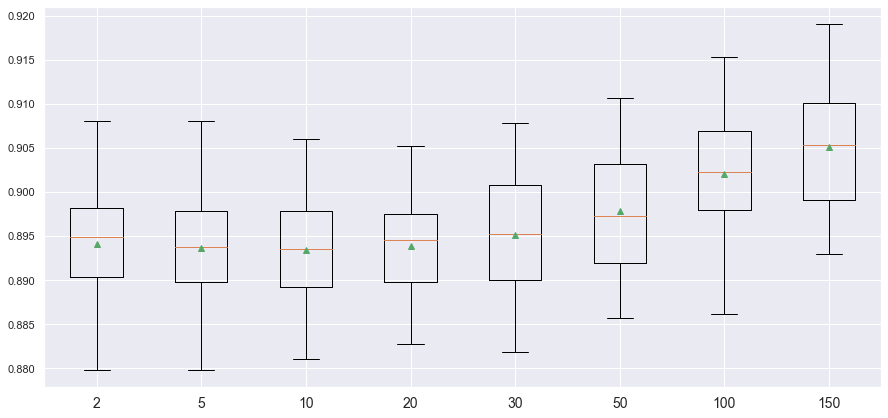

In [227]:
# Compare the results of your models when you define different values for the number of estimators
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

>ad_LR 0.766 (0.009)
>ad_def 0.898 (0.007)


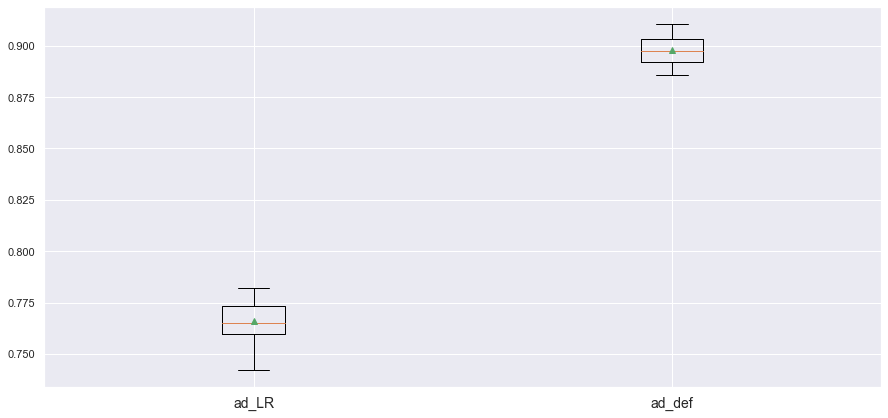

In [228]:
#Compare the results when you define the base_estimator a LogisticRegression and the default version.
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15)  
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

>SAMME 0.895 (0.006)
>SAMME.R 0.898 (0.007)


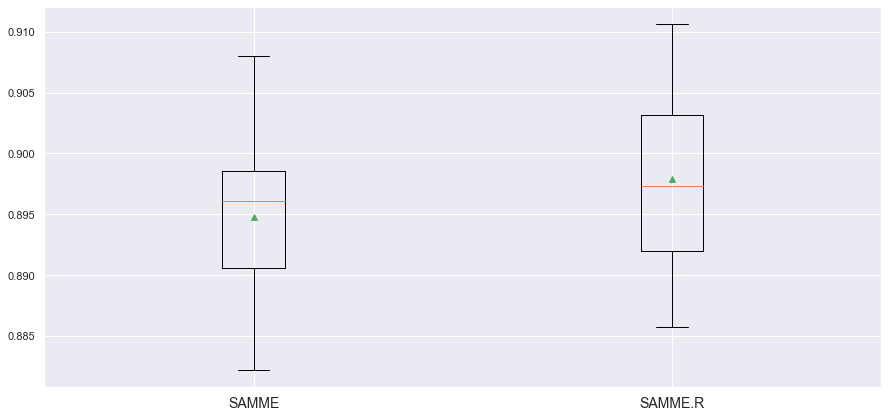

In [229]:
#Check if SAMME.R is the best solution for your dataset.
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(algorithm = value, random_state = 15)      
    return models

models = get_models(["SAMME","SAMME.R"])
return_results(models)

In [232]:
ada_model = AdaBoostClassifier(n_estimators = 15, algorithm = "SAMME.R", random_state = 15)

ada_model.fit(X_res, y_res)

#Predicting on test
y_pred_ada = ada_model.predict(X_val)

print(confusion_matrix(y_val, y_pred_ada))
print(classification_report(y_val, y_pred_ada))

[[2232  302]
 [  92  374]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2534
           1       0.55      0.80      0.65       466

    accuracy                           0.87      3000
   macro avg       0.76      0.84      0.79      3000
weighted avg       0.90      0.87      0.88      3000



In [235]:
#calculating F1-Score for the validation data
f1_score_ada = f1_score(y_val, y_pred_ada)
f1_score_ada

0.6549912434325745

In [241]:
# takes the predictions for the X-test data (get the y-test)
test_pred_ada = ada_model.predict(X_test)

#creating the dataframe from the predicted data and setting the column as the example file
labels_test_ada = pd.DataFrame(test_pred_ada, index=X_test.index, columns=['Buy']) 

#load the dataset test with the predictions to submmit on Kaggle
# labels_test_ada.to_csv('Group09__Version22.csv')

<hr>
<a class="anchor" id="gradient">
    
## 5.4 Gradient Boosting
    
</a>

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

>0.001 0.894 (0.007)
>0.01 0.895 (0.006)
>0.1 0.909 (0.007)
>0.3 0.924 (0.008)
>0.5 0.925 (0.008)
>0.8 0.920 (0.009)
>1.0 0.916 (0.008)


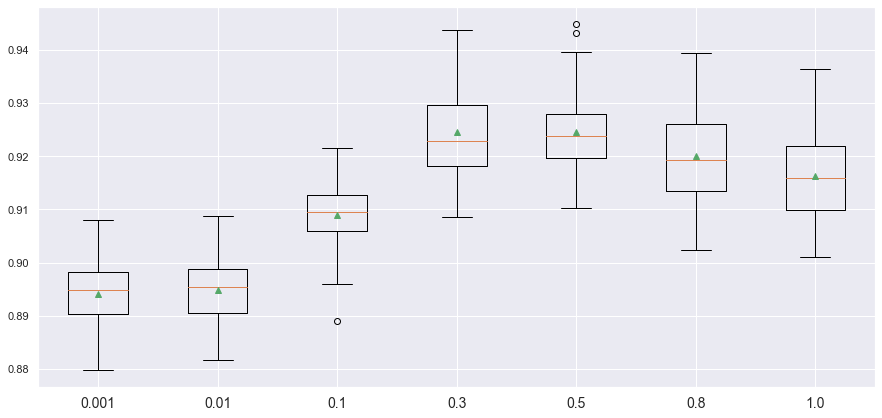

In [243]:
#Compare the results when defining learning rate in the values [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0]
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

>2 0.894 (0.007)
>5 0.894 (0.007)
>10 0.895 (0.007)
>20 0.895 (0.007)
>30 0.896 (0.007)
>50 0.898 (0.007)
>100 0.909 (0.007)
>150 0.916 (0.008)
>200 0.921 (0.008)


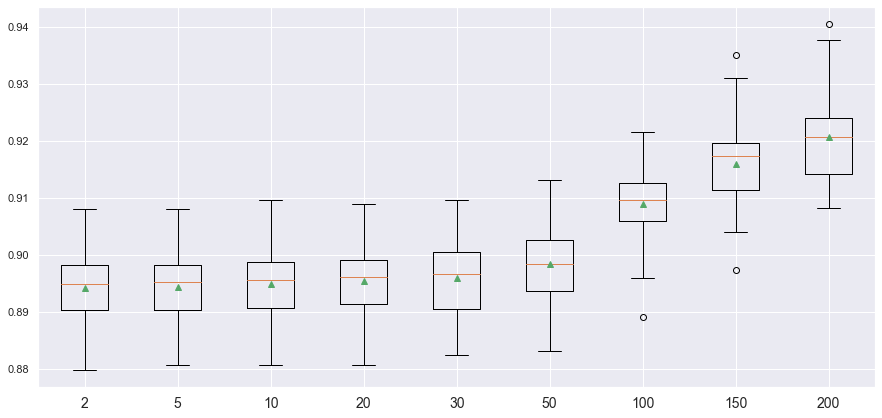

In [244]:
#Check the effect of changing the number of trees with values between 2 to 200 ([2,5,10,20,30,50,100,150,200]).
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value,  random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200])
return_results(models)

In [257]:
gradient_model = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state = 15)

gradient_model.fit(X_res, y_res)

#Predicting on test
y_pred_grad = gradient_model.predict(X_val)

print(confusion_matrix(y_val, y_pred_grad))
print(classification_report(y_val, y_pred_grad))

[[2298  236]
 [ 120  346]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2534
           1       0.59      0.74      0.66       466

    accuracy                           0.88      3000
   macro avg       0.77      0.82      0.79      3000
weighted avg       0.90      0.88      0.89      3000



In [258]:
#calculating F1-Score for the validation data
f1_score_grad = f1_score(y_val, y_pred_grad)
f1_score_grad

0.6603053435114504

In [259]:
# takes the predictions for the X-test data (get the y-test)
test_pred_grad = gradient_model.predict(X_test)

#creating the dataframe from the predicted data and setting the column as the example file
labels_test_grad = pd.DataFrame(test_pred_grad, index=X_test.index, columns=['Buy']) 

#load the dataset test with the predictions to submmit on Kaggle
# labels_test_grad.to_csv('Group09__Version23.csv')

<hr>
<a class="anchor" id="stacking">
    
## 5.5 Stacking in Classification
    
</a>

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [239]:
#create all your models with the default values and fit them to the training data
lr = LogisticRegression(random_state = 10).fit(X_res, y_res)
nb = GaussianNB().fit(X_res, y_res)
kn = KNeighborsClassifier().fit(X_res, y_res)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 10).fit(X_res, y_res)
nn = MLPClassifier(max_iter = 5000, random_state = 10).fit(X_res, y_res)
bg = BaggingClassifier(random_state = 10).fit(X_res, y_res)
ab = AdaBoostClassifier(random_state = 10).fit(X_res, y_res)
rf = RandomForestClassifier(random_state = 10).fit(X_res, y_res)
gb = GradientBoostingClassifier(random_state = 10).fit(X_res, y_res)

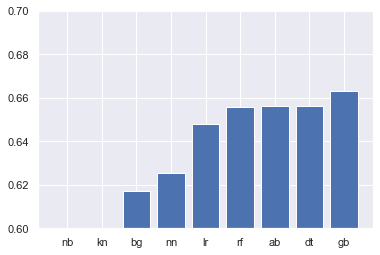

In [240]:
# Using the f1 score, evaluating the performance of the models in the validation dataset.
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.60,0.7)
plt.show()

In [275]:
# Create a list of estimators that will contain the two best estimators obtained in the previous step

estimators = [('gb', GradientBoostingClassifier(random_state = 15)),
              ('dt', DecisionTreeClassifier(max_depth = 3, random_state = 10)
              )]

In [276]:
#Creating a Stacking classifier and define the estimators and final_estimators parameters

st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_res, y_res)

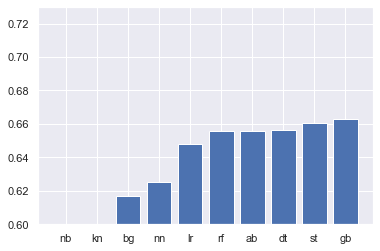

In [277]:
# plotting the f1 score for all of the models and include this time the stacking classifier.
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val)),
              f1_score(y_val, st.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb','st']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.73)
plt.show()

In [278]:
#Predicting on test
y_pred_stack = st.predict(X_val)

print(confusion_matrix(y_val, y_pred_grad))
print(classification_report(y_val, y_pred_stack))

[[2298  236]
 [ 120  346]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2534
           1       0.58      0.77      0.66       466

    accuracy                           0.88      3000
   macro avg       0.77      0.83      0.79      3000
weighted avg       0.90      0.88      0.88      3000



In [279]:
#calculating F1-Score for the validation data
f1_score_st = f1_score(y_val, y_pred_stack)
f1_score_st

0.6605166051660516

In [265]:
# takes the predictions for the X-test data (get the y-test)
test_pred_st = st.predict(X_test)

#creating the dataframe from the predicted data and setting the column as the example file
labels_test_st = pd.DataFrame(test_pred_st, index=X_test.index, columns=['Buy']) 

#load the dataset test with the predictions to submmit on Kaggle
# labels_test_st.to_csv('Group09__Version24.csv')

<hr>
<a class="anchor" id="kaggle">
    
# 6.0 Final Model - Kaggle Submission
    
</a>

In [280]:
dt_final = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, splitter='best', max_features= None, 
                                  max_leaf_nodes= None, random_state = 15)


#Fit the data oversampled to the model instanced (data after SMOTE application)
dt_final.fit(X_res, y_res)


#Predicting on test
y_pred_dt = dt_final.predict(X_val)

print(confusion_matrix(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))

[[2244  290]
 [  95  371]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2534
           1       0.56      0.80      0.66       466

    accuracy                           0.87      3000
   macro avg       0.76      0.84      0.79      3000
weighted avg       0.90      0.87      0.88      3000



In [281]:
#calculating F1-Score for the validation data
f1_score_dt_final = f1_score(y_val, y_pred_dt)
f1_score_dt_final

0.6583850931677019

In [282]:
# takes the predictions for the X-test data (get the y-test)
test_pred = dt_final.predict(X_test)

#creating the dataframe from the predicted data and setting the column as the example file
labels_test_submission = pd.DataFrame(test_pred, index=X_test.index, columns=['Buy']) 

#load the dataset test with the predictions to submmit on Kaggle
# labels_test_submission.to_csv('Group09__Version20.csv')

In [288]:
labels_test_submission['Buy'].value_counts()

0    1825
1     475
Name: Buy, dtype: int64

<hr>

    
# Thank You
    
</a>